In [1]:
pip install scikit-learn

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()

end_date = '2023-09-27'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df

[*********************100%%**********************]  503 of 503 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588034   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716064   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024632   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[994088 rows x 6 columns]

#### we added 0 to get one data frame as there were 2 data frame

## Calculate features and technical indicators
### Garman -klass volatilit
### RSI
### Bollinger Bands
### ATR
### MACD
### Dollar Volume

## Calculate garman_klass_vol

In [3]:
# df['garman_klass_vol']=((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

# calculate using chat gpt garman_klass_vol

In [4]:
# import numpy as np

# df['garman_klass_vol'] = np.sqrt(
#     (1 / len(df)) * np.sum((np.log(df['high'] / df['low'])) ** 2) -
#     (2 / len(df)) * np.sum(np.log(df['adj close'] / df['open']) * (np.log(df['high'] / df['low']))) +
#     (1 / len(df)) * np.sum((np.log(df['adj close'] / df['open'])) ** 2)
# )
# df

# Calculate RSI

In [5]:
# df['rsi']= df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))

In [6]:
# df.xs('AAPL',level=1)['rsi'].plot()

# Calculate Bollinger Bands

In [7]:
# pandas_ta.bbands(close=df.xs('AAPL',level=1)['adj close'],length=20)

# ALERT CHECK COMMENT OUT

In [8]:
# df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])
# df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])
# df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])


## calculate ATR

In [9]:
# def compute_atr(stock_data):
#     atr= pandas_ta.atr(high=stock_data['high'],
#                      low=stock_data['low'],
#                       close=stock_data['close'],
#                       length=14)
#     return atr.sub(atr.mean()).div(atr.std())

# df['atr'] = df.groupby(level=1,group_keys=False).apply(compute_atr)

# Calculate MACD

In [10]:
# def compute_macd(close):
#     macd = pandas_ta.macd(close=close, length=20).iloc[:, 0]
#     return (macd - macd.mean()) / macd.std()

# df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)


### Calculate Dollar volume

In [11]:
# df['dollar_volume']=(df['adj close'])*df['volume']/1e6

## Final Calculate all features and joining

In [12]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
                                                          
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.588034   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716064   27.264999   28.377501   26.965000   28.207500   
           ABBV     37.024632   52.790001   54.189999   51.880001   53.099998   
           ABT      33.807278   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     112.216316  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.447540  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000854        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.049280        NaN       NaN   
           ABT      12287500.0         -0.008237        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000037  36.057200  4.821521   
           ZBH       3610500.0          0.000224  31.893246  4.751923   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000075  42.623483  5.161192   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.148887  
           AAL          NaN       NaN       NaN       NaN     279.420069  
           AAPL         NaN       NaN       NaN       NaN    7253.215820  
           ABBV         NaN       NaN       NaN       NaN     475.499937  
           ABT          NaN       NaN       NaN       NaN     415.406924  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.851489  4.881456  0.142547 -1.363696     185.213334  
           ZBH     4.791592  4.831260 -0.381708 -0.881067     405.157010  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.582765  3.638202 -0.161699 -0.164625      53.263340  
           ZTS     5.220007  5.278822  0.651515 -1.188278     258.178041  

[994088 rows x 14 columns]

## Getting monthly index and average dollar volume and making it multiindex

# Aggregrate to monthly level and filter top 150 most liquid stocks for each month
 to reduce training and experiment with future and stratagies we convert the buisness daily data to month end frequency

In [13]:
last_cols =[c for c in df.columns.unique(0)if c not in['dollar_volume','volume','open','high','low','close']]
last_cols
data=pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A          136.444145   39.152699         -0.001810  73.421456   
           AAL        287.915789   39.429935         -0.000966  40.719002   
           AAPL      4034.583639   26.924873         -0.003119  55.537337   
           ABBV       343.971771   41.160297         -0.053947  49.376838   
           ABT        213.736331   38.669399         -0.009962  56.962643   
...                          ...         ...               ...        ...   
2023-09-30 OTIS       155.565476   78.967529          0.000040  33.116247   
           ABNB      1633.500725  132.279999          0.000213  44.494127   
           CEG        197.358104  108.239204          0.000220  55.245464   
           GEHC       212.434213   66.179550          0.000185  40.922330   
           KVUE       684.902631   20.426666          0.000136  35.706322   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.549210  3.621664  3.694119 -1.033887  0.567158  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418772  
           AAPL    3.284211  3.327527  3.370843 -0.967900 -0.142789  
           ABBV    3.745051  3.793320  3.841588 -0.526809  0.145677  
           ABT     3.665571  3.687430  3.709289 -1.064842  0.335558  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.377807  4.423099  4.468390 -1.028320 -1.534536  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.655604  4.695779  4.735953 -0.436215  0.366876  
           GEHC    4.156170  4.213706  4.271243 -0.893478 -1.116463  
           KVUE    3.034066  3.109082  3.184098 -0.899746 -1.435620  

[46937 rows x 9 columns]

In [14]:
data['dollar_volume'].unstack('ticker').rolling(5*12).mean()

ticker               A         AAL          AAPL        ABBV         ABT  \
date                                                                       
2015-11-30         NaN         NaN           NaN         NaN         NaN   
2015-12-31         NaN         NaN           NaN         NaN         NaN   
2016-01-31         NaN         NaN           NaN         NaN         NaN   
2016-02-29         NaN         NaN           NaN         NaN         NaN   
2016-03-31         NaN         NaN           NaN         NaN         NaN   
...                ...         ...           ...         ...         ...   
2023-05-31  190.851392  557.208280  10725.385917  693.206562  526.906772   
2023-06-30  192.511290  559.040671  10839.239707  697.818268  531.065599   
2023-07-31  194.583315  561.599566  10941.821349  703.347434  534.878207   
2023-08-31  195.727553  563.839976  11011.623400  706.828239  538.080427   
2023-09-30  197.397925  565.559637  11087.551078  711.069926  539.011956   

ticker           ACGL         ACN         ADBE         ADI         ADM  ...  \
date                                                                    ...   
2015-11-30        NaN         NaN          NaN         NaN         NaN  ...   
2015-12-31        NaN         NaN          NaN         NaN         NaN  ...   
2016-01-31        NaN         NaN          NaN         NaN         NaN  ...   
2016-02-29        NaN         NaN          NaN         NaN         NaN  ...   
2016-03-31        NaN         NaN          NaN         NaN         NaN  ...   
...               ...         ...          ...         ...         ...  ...   
2023-05-31  76.987357  506.700322  1131.536101  413.388290  168.099329  ...   
2023-06-30  78.205346  515.036670  1156.604909  420.788361  169.122972  ...   
2023-07-31  80.791199  519.455429  1172.120773  428.212278  170.680067  ...   
2023-08-31  82.330530  523.470497  1181.508270  434.990198  171.462188  ...   
2023-09-30  83.634043  528.184127  1195.951128  439.827471  173.564305  ...   

ticker      FOXA  FOX  DOW  CTVA  CARR  OTIS  ABNB  CEG  GEHC  KVUE  
date                                                                 
2015-11-30   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2015-12-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2016-01-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2016-02-29   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2016-03-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
...          ...  ...  ...   ...   ...   ...   ...  ...   ...   ...  
2023-05-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2023-06-30   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2023-07-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2023-08-31   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  
2023-09-30   NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  

[95 rows x 502 columns]

In [15]:
data['dollar_vol_rank']= (data.groupby('date')['dollar_volume'].rank(ascending=False))
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume','dollar_vol_rank'],axis=1)

In [16]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-11-30 AAL      39.429935         -0.000966  40.719002  3.672028   
           AAPL     26.924873         -0.003119  55.537337  3.284211   
           ABBV     41.160297         -0.053947  49.376838  3.745051   
           ABT      38.669399         -0.009962  56.962643  3.665571   
           ACN      94.345917         -0.006636  59.371832  4.525864   
...                       ...               ...        ...       ...   
2023-09-30 WMT     162.500000          0.000024  54.722508  5.081613   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           ABNB    132.279999          0.000213  44.494127  4.857047   
           KVUE     20.426666          0.000136  35.706322  3.034066   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-11-30 AAL     3.749832  3.827636  0.190822 -0.418772  
           AAPL    3.327527  3.370843 -0.967900 -0.142789  
           ABBV    3.793320  3.841588 -0.526809  0.145677  
           ABT     3.687430  3.709289 -1.064842  0.335558  
           ACN     4.550195  4.574525 -1.121687  0.039554  
...                     ...       ...       ...       ...  
2023-09-30 WMT     5.099300  5.116986 -0.196379  0.399459  
           XOM     4.744375  4.784477  0.601335  1.400623  
           MRNA    4.685332  4.788149 -0.529511 -0.376899  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  
           KVUE    3.109082  3.184098 -0.899746 -1.435620  

[14155 rows x 8 columns]

# Calculate Monthly returns for different time horizion features 
* TO capture time series dynamics that reflects ,for example,momentum patterns, we compute historical returns using the method .pct_change(lag) that is, returns over various monthly periods as identified by lags

In [17]:
def calculate_returns(df):
    
   
    outlier_cutoff =0.005
    lags=[1,2,3,6,9,12]
    for lag in lags:
        df[f'return_{lag}m']=(df['adj close']
                            .pct_change(lag)
                            .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),upper=x.quantile(1-outlier_cutoff)))
                            .add(1)
                            .pow(1/lag)
                            .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data
    

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-11-30 AAL      44.876518          0.000189  71.397570  3.656155   
           AAPL     25.713816         -0.002422  48.015349  3.251985   
           ABBV     44.699753         -0.039654  49.727663  3.740504   
           ABT      33.597481         -0.007707  39.665490  3.539788   
           ACN     107.214012         -0.005559  54.807739  4.655544   
...                       ...               ...        ...       ...   
2023-09-30 WFC      40.290813          0.000136  40.920287  3.709473   
           WMT     162.500000          0.000024  54.722508  5.081613   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2016-11-30 AAL     3.770906  3.885658  0.263773  2.344164   0.146730   
           AAPL    3.281053  3.310121 -1.011998 -0.314781  -0.021601   
           ABBV    3.814687  3.888870 -0.617478 -0.257987   0.089997   
           ABT     3.576250  3.612712 -0.981659 -0.575623  -0.029817   
           ACN     4.679425  4.703306 -0.928960  0.031425   0.027443   
...                     ...       ...       ...       ...        ...   
2023-09-30 WFC     3.749849  3.790225 -0.558742 -0.282325  -0.015500   
           WMT     5.099300  5.116986 -0.196379  0.399459  -0.000676   
           XOM     4.744375  4.784477  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2016-11-30 AAL      0.127700   0.086493   0.065515   0.014886    0.010841  
           AAPL    -0.008718   0.015430   0.018834   0.016838   -0.003828  
           ABBV    -0.013645  -0.014453  -0.002749   0.015097    0.006898  
           ABT     -0.048193  -0.030325  -0.004603   0.000125   -0.011648  
           ACN     -0.006148   0.016178   0.002371   0.021900    0.010712  
...                      ...        ...        ...        ...         ...  
2023-09-30 WFC     -0.057917  -0.013554   0.016712   0.000702    0.003255  
           WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           ABNB    -0.067704   0.010603   0.010289   0.048608    0.019401  

[11157 rows x 14 columns]

# 5. Download Fama-French Factors and Calculate Rolling Factor Betas.
* We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

* The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

* We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [18]:
 factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF',axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data= factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-11-30 AAL     0.0486  0.0707  0.0821 -0.0018  0.0370   0.146730
           AAPL    0.0486  0.0707  0.0821 -0.0018  0.0370  -0.021601
           ABBV    0.0486  0.0707  0.0821 -0.0018  0.0370   0.089997
           ABT     0.0486  0.0707  0.0821 -0.0018  0.0370  -0.029817
           ACN     0.0486  0.0707  0.0821 -0.0018  0.0370   0.027443
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WBA    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.461367
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[11157 rows x 6 columns]

* filter out stocks with less than 10 months

In [19]:
observation = factor_data.groupby(level=1).size()
valid_stocks = observation[observation>=10]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2016-11-30 AAL     0.0486  0.0707  0.0821 -0.0018  0.0370   0.146730
           AAPL    0.0486  0.0707  0.0821 -0.0018  0.0370  -0.021601
           ABBV    0.0486  0.0707  0.0821 -0.0018  0.0370   0.089997
           ABT     0.0486  0.0707  0.0821 -0.0018  0.0370  -0.029817
           ACN     0.0486  0.0707  0.0821 -0.0018  0.0370   0.027443
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WBA    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.461367
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[11034 rows x 6 columns]

* calculate Rolling Factor Betas

In [20]:
betas =(factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2016-11-30 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VZ      0.332559 -0.165265  0.265878  0.310497  0.107925
           WBA     0.908639 -1.077749 -2.434821 -1.309407  5.021211
           WFC     1.121746  0.300521  2.061532 -0.439488 -1.517557
           WMT     0.700562 -0.315621 -0.413352 -0.142915  0.508415
           XOM     0.981674 -1.096801  1.756656 -0.642222 -0.371325

[11034 rows x 5 columns]

In [21]:
factors=['Mkt-RF','SMB','HML','RMW','CMA']

data =data.join(betas.groupby('ticker').shift())
data.loc[:,factors] = data.groupby('ticker',group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data = data.dropna()
data = data.drop('adj close', axis=1)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10554 entries, (Timestamp('2016-11-30 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'MRNA')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10554 non-null  float64
 1   rsi               10554 non-null  float64
 2   bb_low            10554 non-null  float64
 3   bb_mid            10554 non-null  float64
 4   bb_high           10554 non-null  float64
 5   atr               10554 non-null  float64
 6   macd              10554 non-null  float64
 7   return_1m         10554 non-null  float64
 8   return_2m         10554 non-null  float64
 9   return_3m         10554 non-null  float64
 10  return_6m         10554 non-null  float64
 11  return_9m         10554 non-null  float64
 12  return_12m        10554 non-null  float64
 13  Mkt-RF            10554 non-null  float64
 14  SMB               10554 non-null  float64
 15  HML       

### At this point we have to decide on what ML model and approach to use for predictions etc.
### 6. For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
### K-Means Clustering
* You may want to initialize predefined centroids for each cluster based on your research.

* For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

* Then we will pre-define our centroids for each cluster. 

In [22]:
from sklearn.cluster import KMeans

#data = data.drop('cluster',axis=1) # added later after clustering with random

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init='random').fit(df).labels_ # changed 'random' to initial centriods
    return df
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
data


garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2016-11-30 AAL             0.000189  71.397570  3.656155  3.770906  3.885658   
           AAPL           -0.002422  48.015349  3.251985  3.281053  3.310121   
           ABBV           -0.039654  49.727663  3.740504  3.814687  3.888870   
           ABT            -0.007707  39.665490  3.539788  3.576250  3.612712   
           ACN            -0.005559  54.807739  4.655544  4.679425  4.703306   
...                             ...        ...       ...       ...       ...   
2023-09-30 WBA            -0.000136  25.028834  3.021828  3.133713  3.245598   
           WFC             0.000136  40.920287  3.709473  3.749849  3.790225   
           WMT             0.000024  54.722508  5.081613  5.099300  5.116986   
           XOM             0.000068  59.440186  4.704273  4.744375  4.784477   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-11-30 AAL     0.263773  2.344164   0.146730   0.127700   0.086493   
           AAPL   -1.011998 -0.314781  -0.021601  -0.008718   0.015430   
           ABBV   -0.617478 -0.257987   0.089997  -0.013645  -0.014453   
           ABT    -0.981659 -0.575623  -0.029817  -0.048193  -0.030325   
           ACN    -0.928960  0.031425   0.027443  -0.006148   0.016178   
...                     ...       ...        ...        ...        ...   
2023-09-30 WBA    -1.813421 -1.474186  -0.461367  -0.267373  -0.130532   
           WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           WMT    -0.196379  0.399459  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-11-30 AAL      0.065515   0.014886    0.010841  1.358397  1.041565   
           AAPL     0.018834   0.016838   -0.003828  1.116546 -0.228554   
           ABBV    -0.002749   0.015097    0.006898  0.596029  0.161684   
           ABT     -0.004603   0.000125   -0.011648  0.852125 -0.250181   
           ACN      0.002371   0.021900    0.010712  1.170419 -0.148991   
...                      ...        ...         ...       ...       ...   
2023-09-30 WBA     -0.109701  -0.099794   -0.078203  0.252998 -0.696590   
           WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740059 -0.261914   
           XOM      0.012838   0.008747    0.027037  1.004028 -1.054568   
           MRNA    -0.071952  -0.064976   -0.015431  1.155109  0.761331   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2016-11-30 AAL     0.746893  0.140442  0.798648        2  
           AAPL   -0.607443  0.634582 -0.074088        0  
           ABBV    0.108146 -0.174110 -0.036492        0  
           ABT    -0.503838  0.123233  0.906605        3  
           ACN    -0.292459  0.246776  0.094523        1  
...                     ...       ...       ...      ...  
2023-09-30 WBA    -0.827678 -0.659032  3.303480        0  
           WFC     2.009074 -0.404336 -1.468839        3  
           WMT    -0.522596 -0.126427  0.642566        2  
           XOM     1.707982 -0.677021 -0.287258        2  
           MRNA   -1.164605  0.589836  0.992841        3  

[10554 rows x 19 columns]

In [23]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
# the impoertant thing we are chosing which column iloc[:,5] is atr and 1 is rsi
    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
# labeling
    x_label = data.columns[5]
    y_label = data.columns[1]
    plt.title(f'Clusters based on {x_label} and {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    return

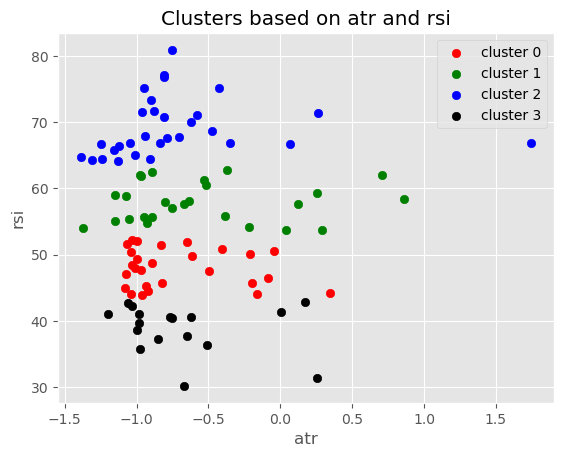

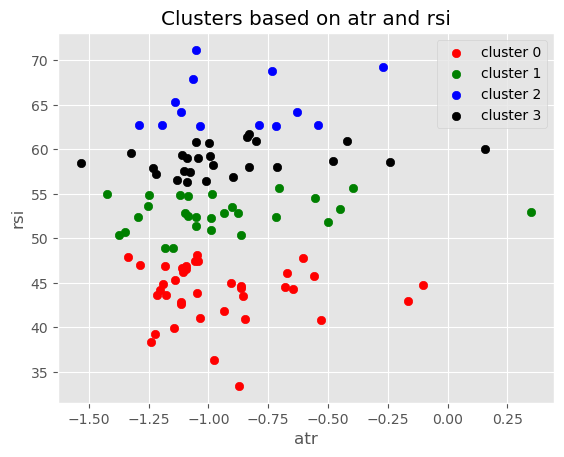

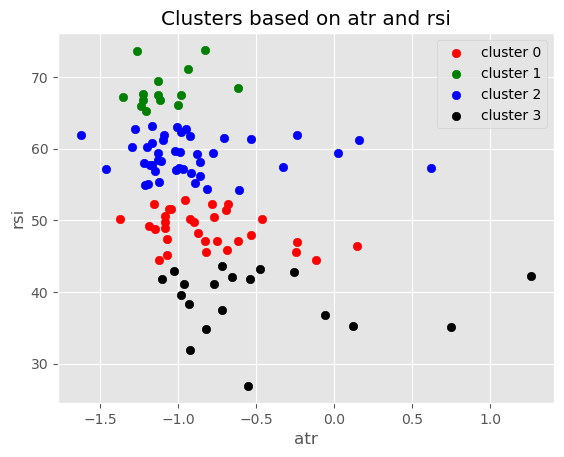

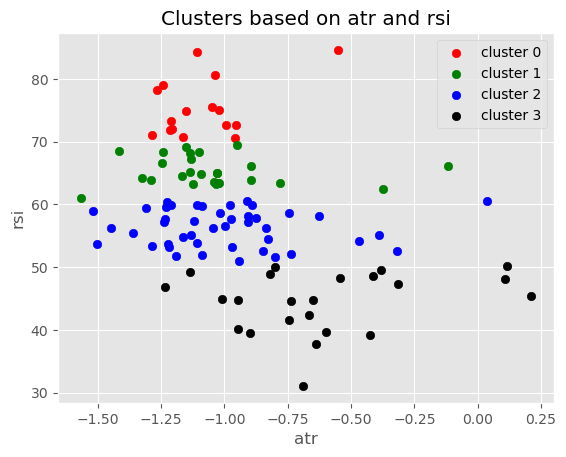

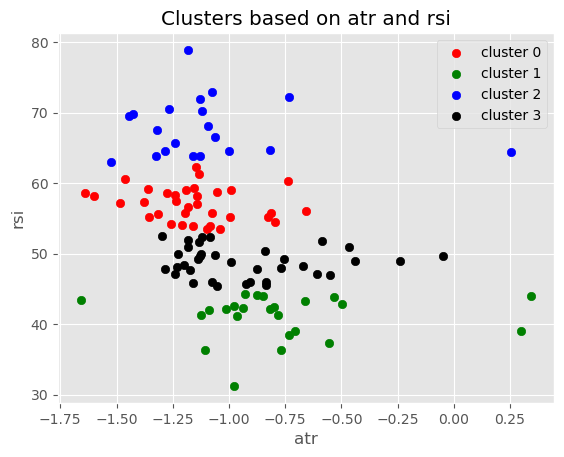

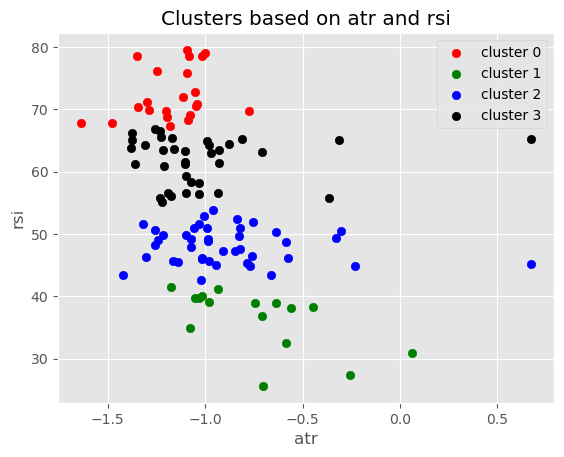

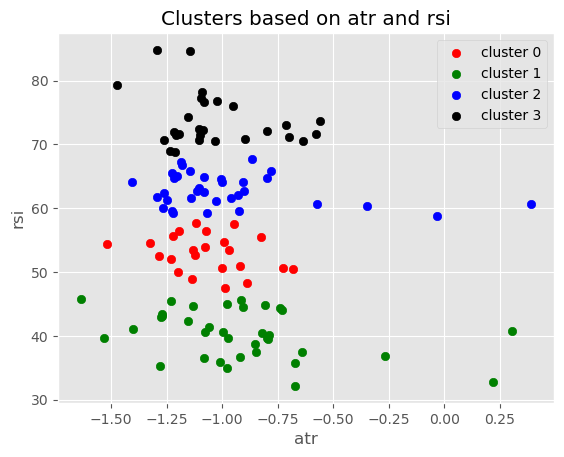

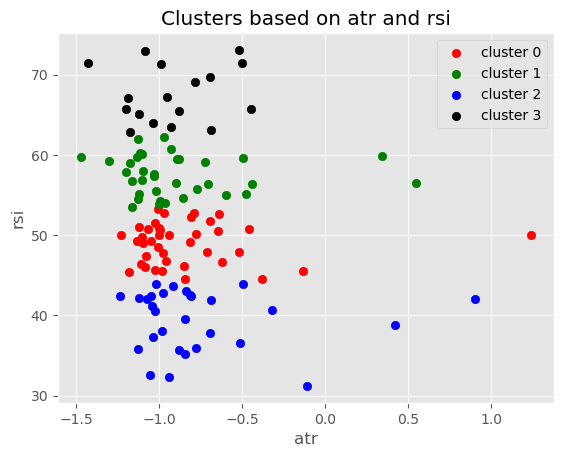

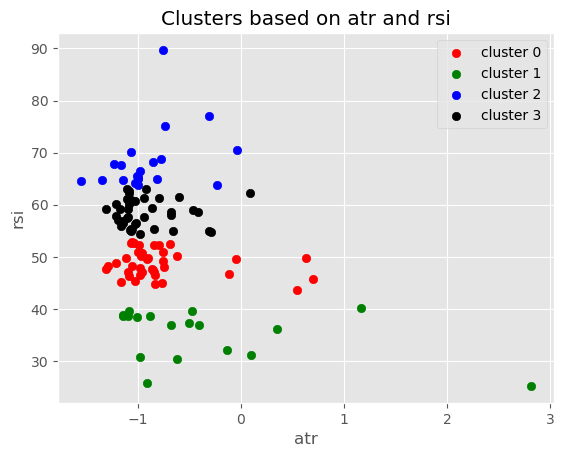

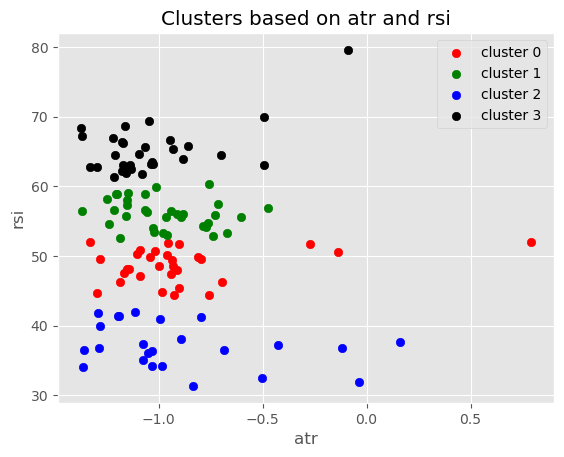

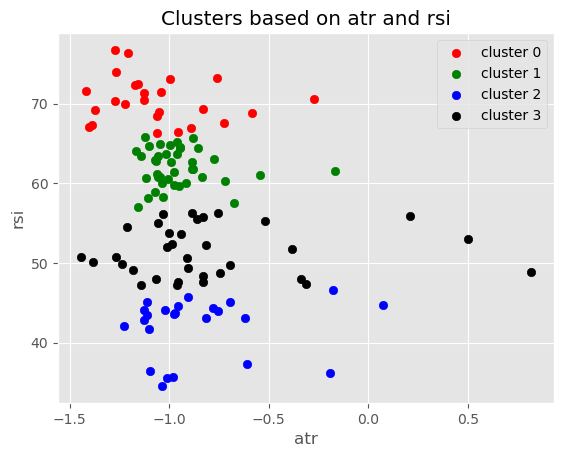

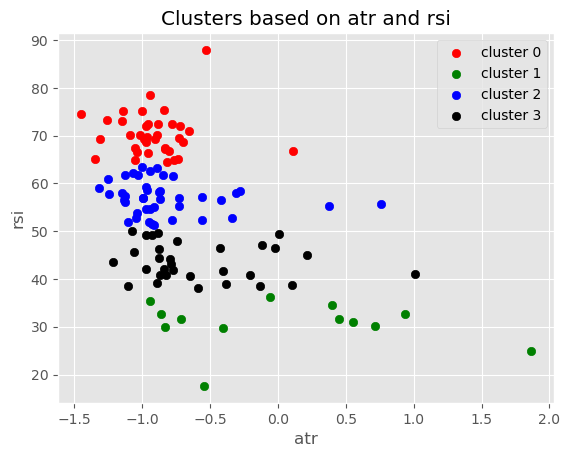

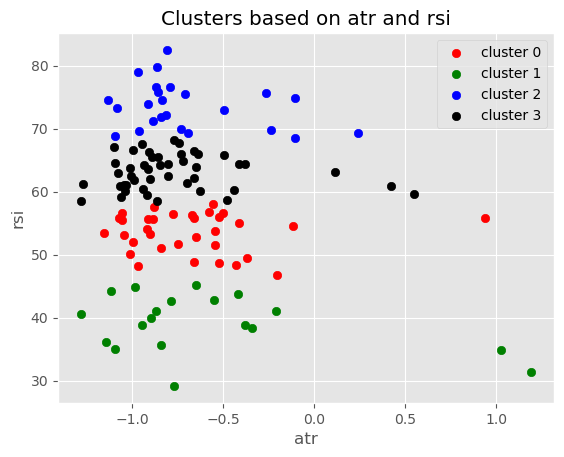

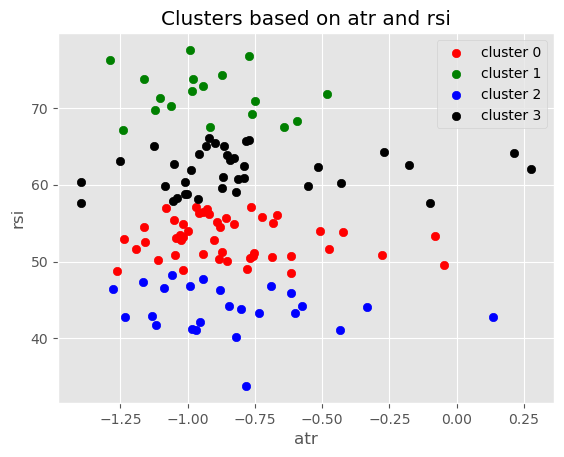

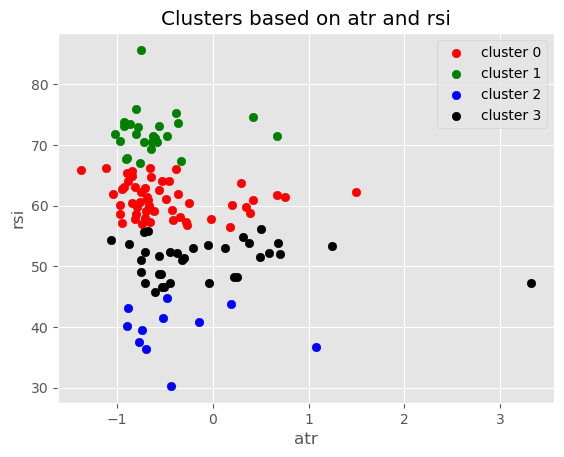

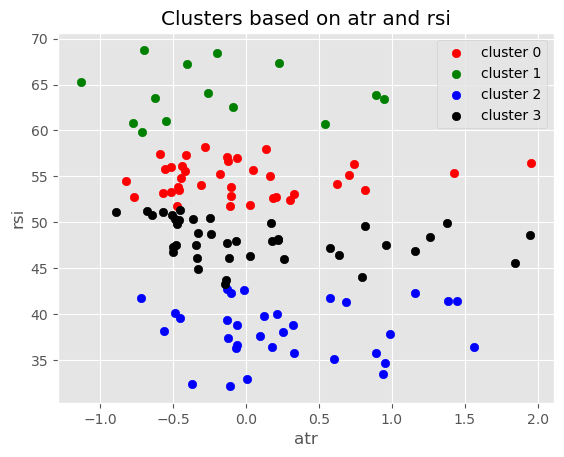

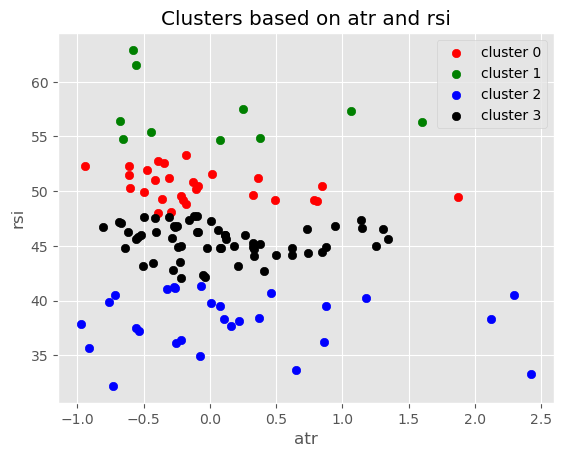

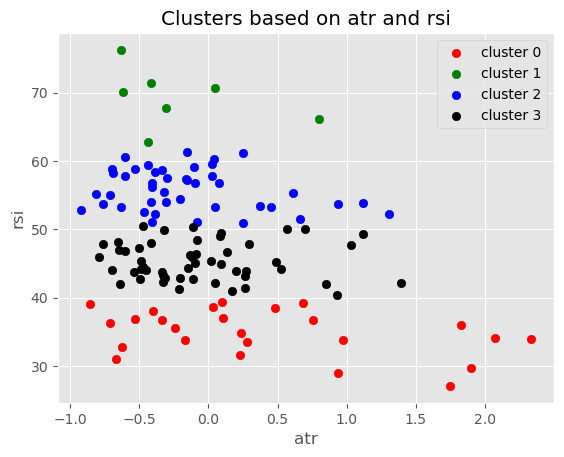

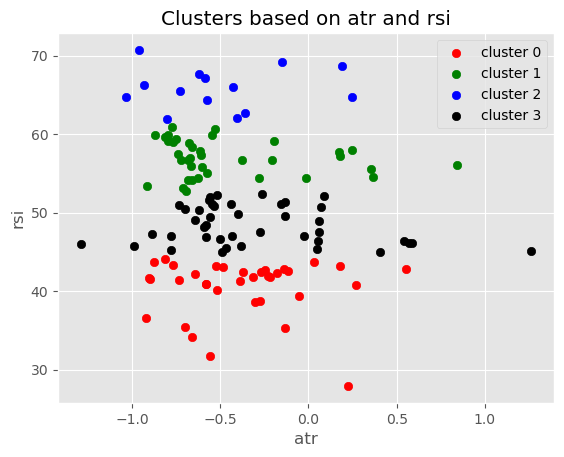

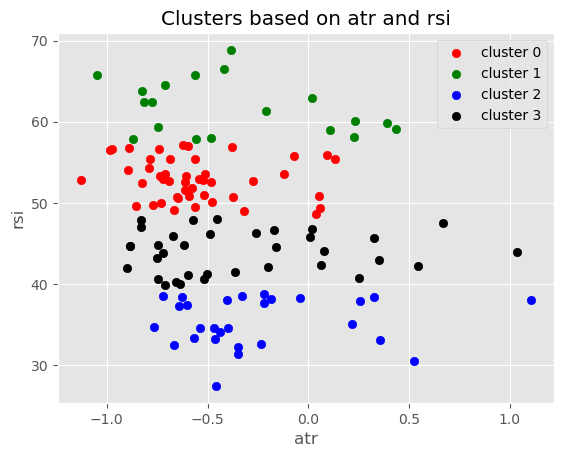

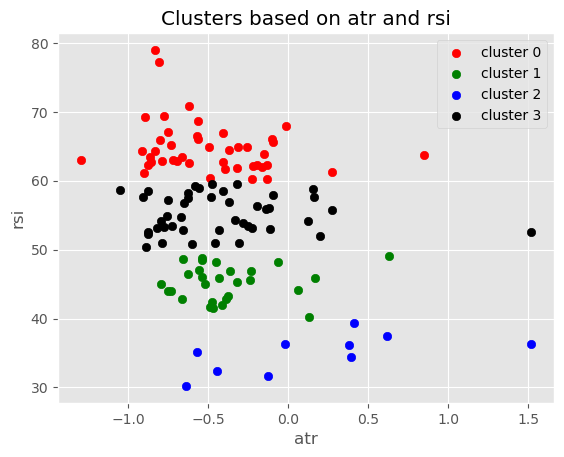

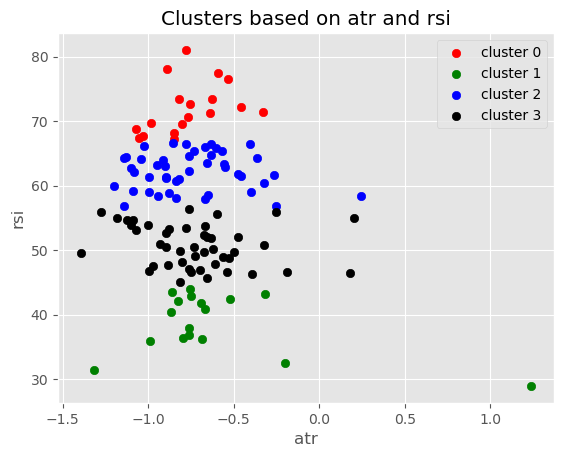

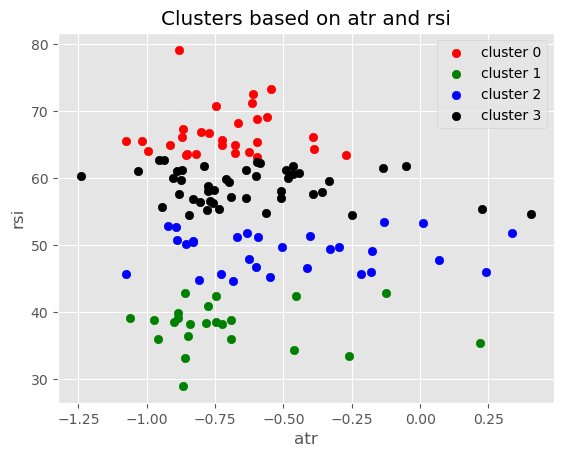

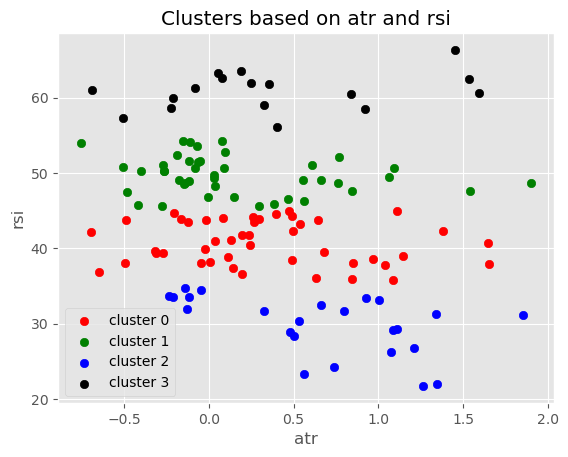

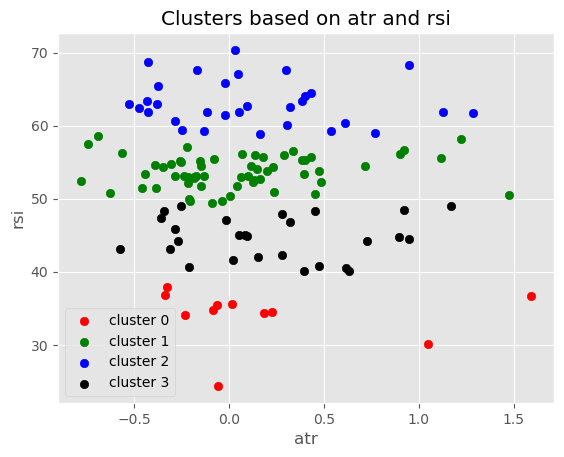

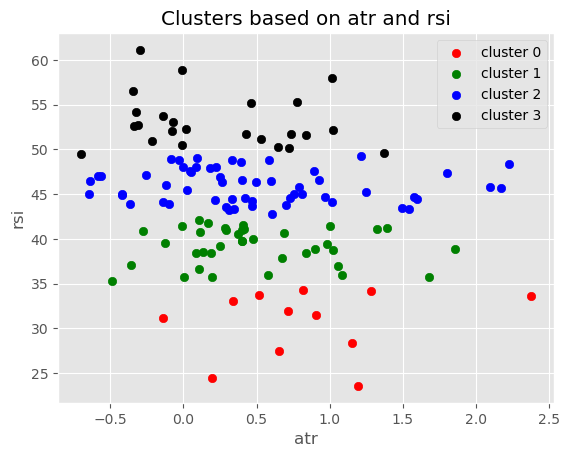

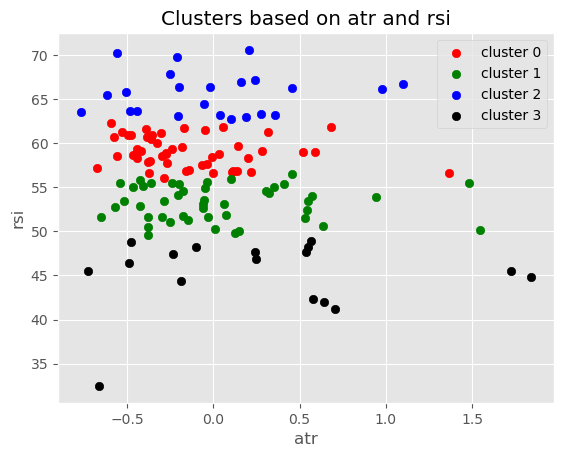

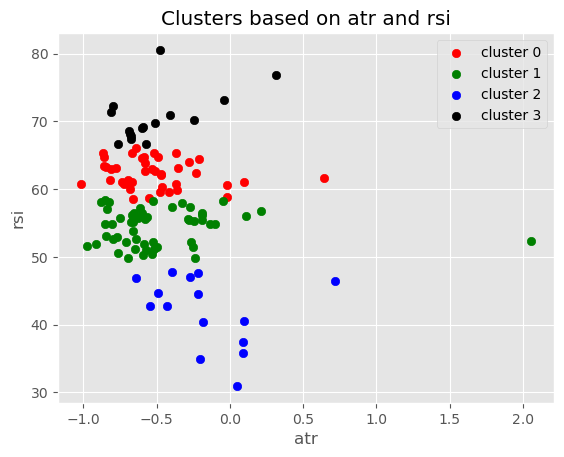

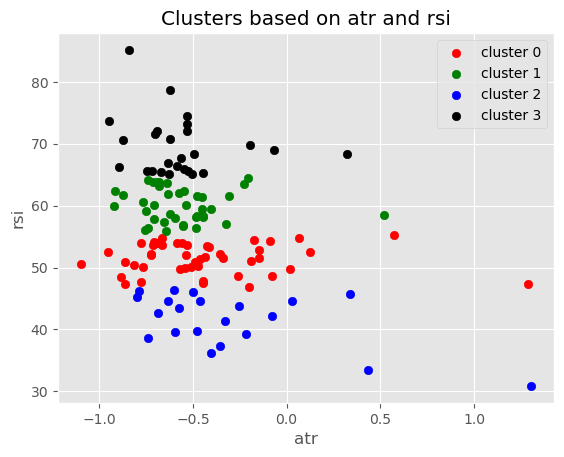

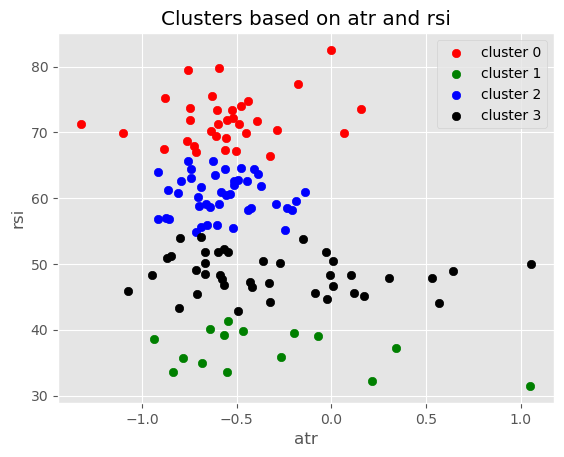

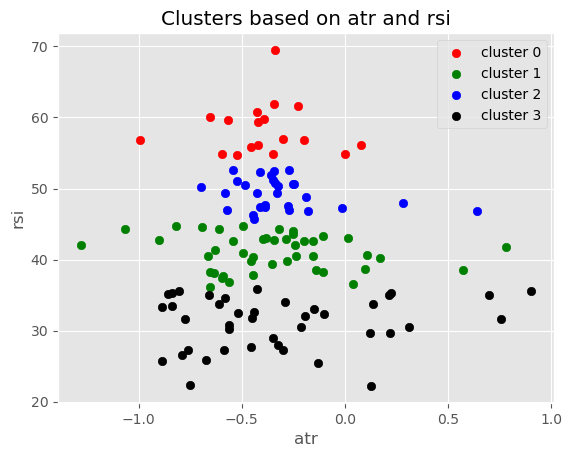

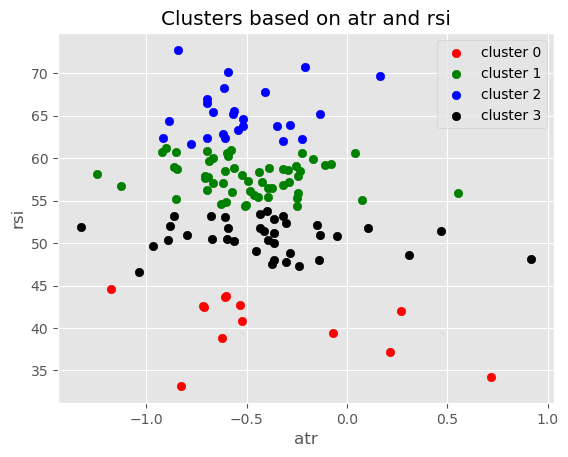

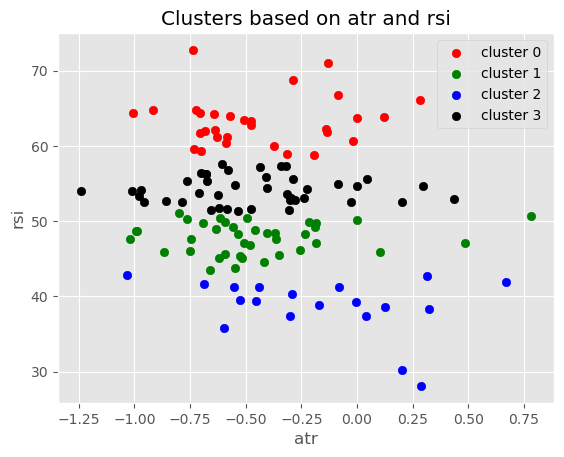

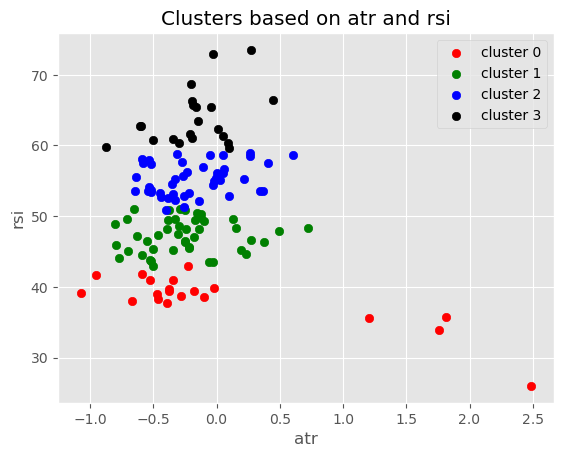

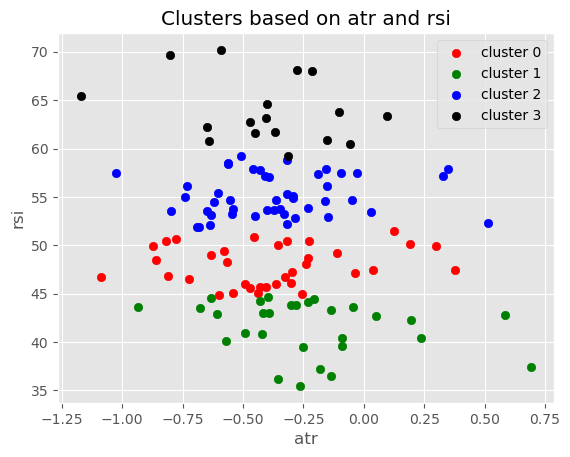

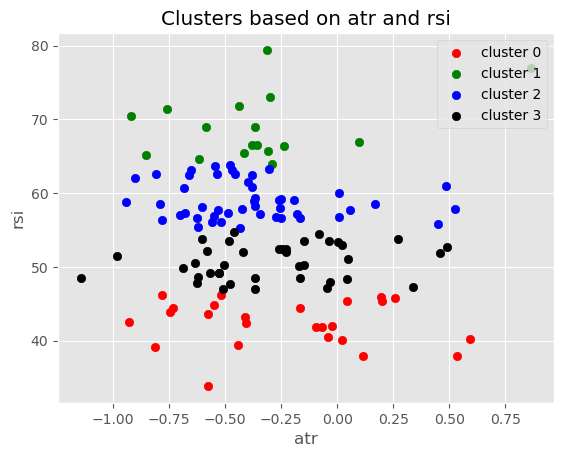

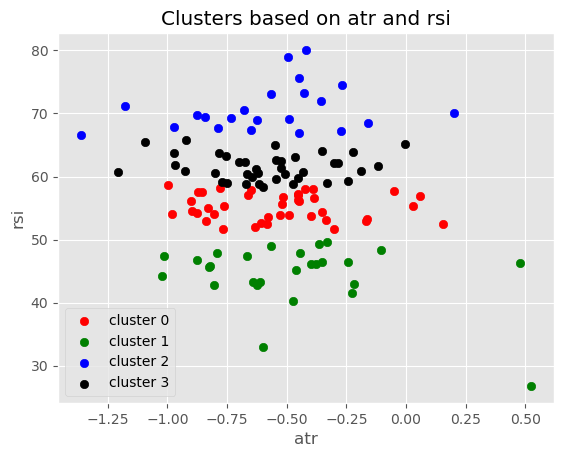

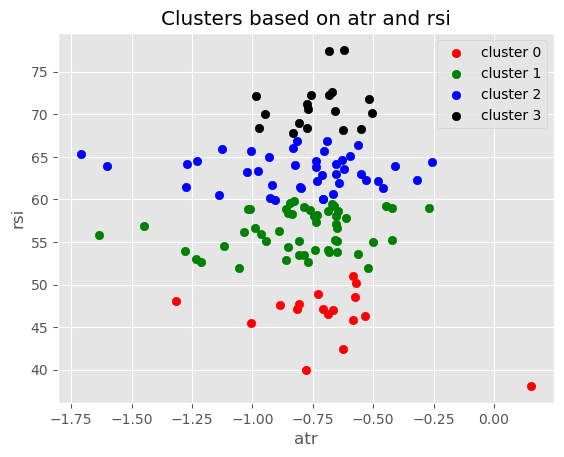

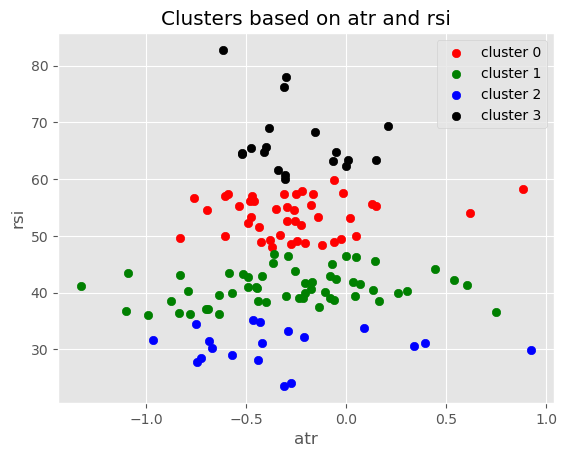

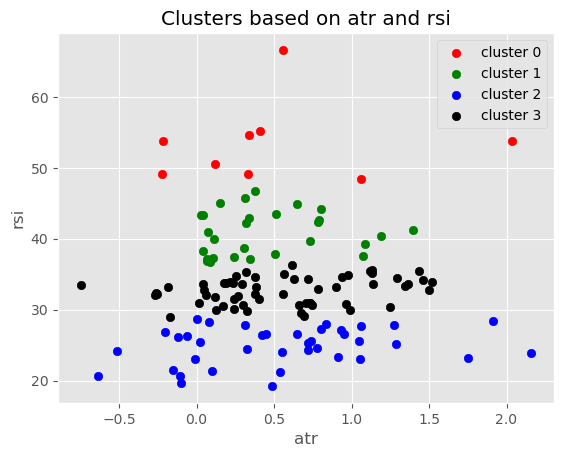

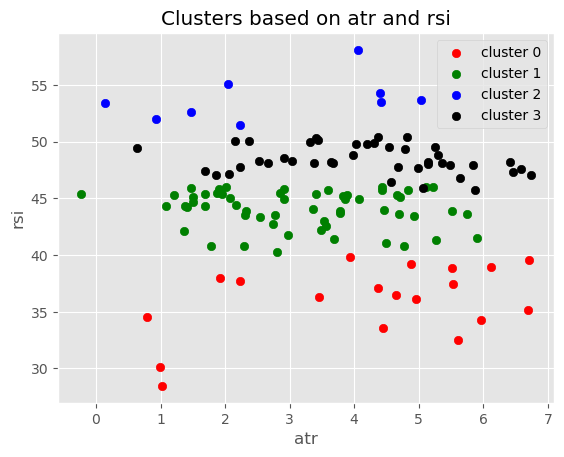

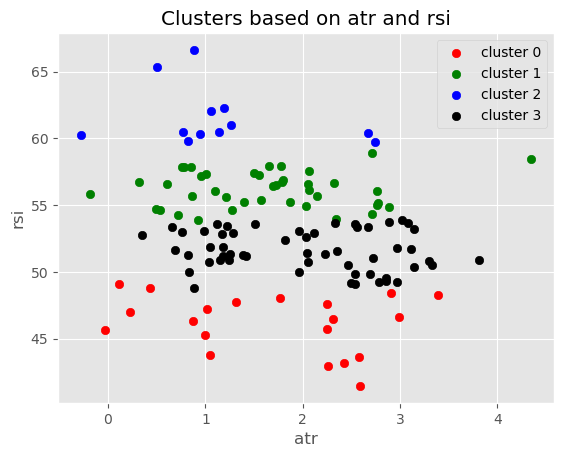

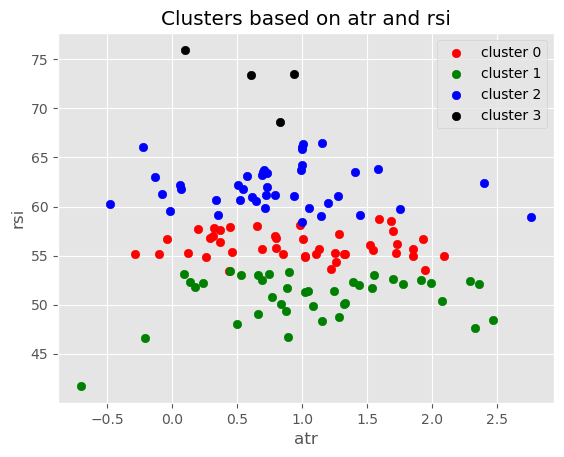

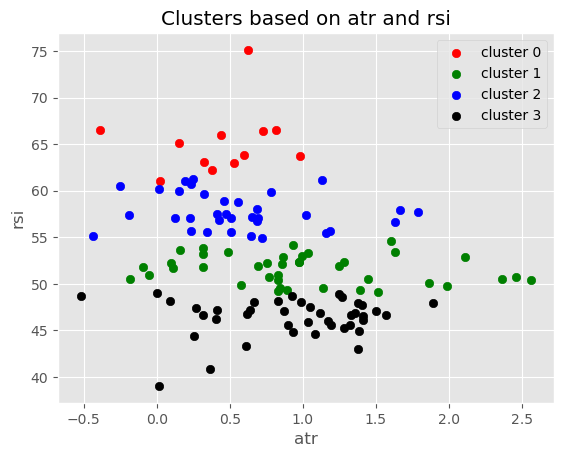

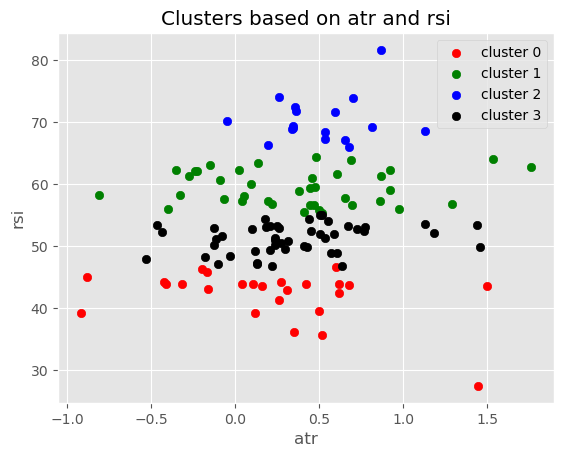

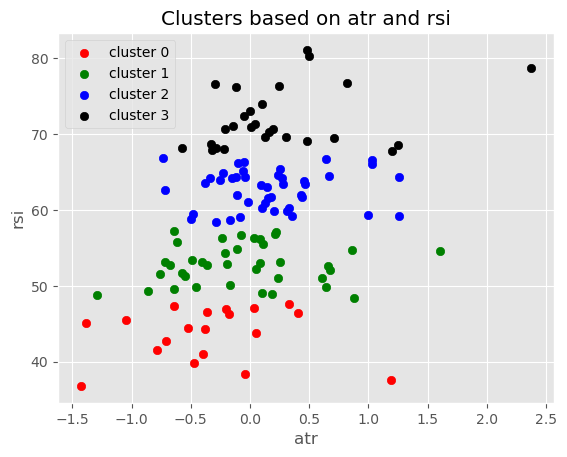

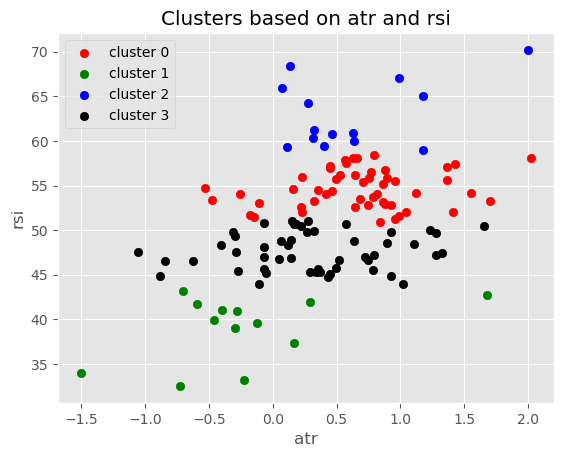

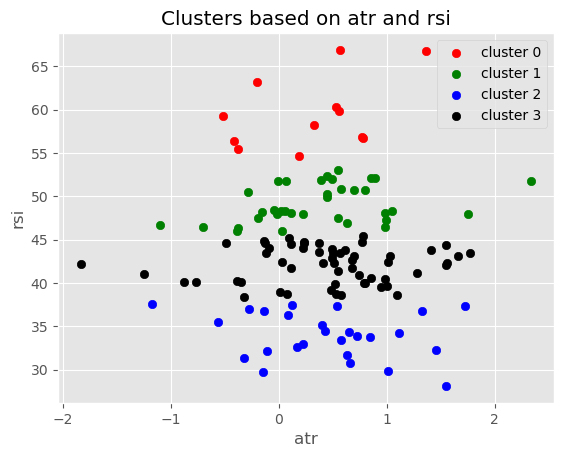

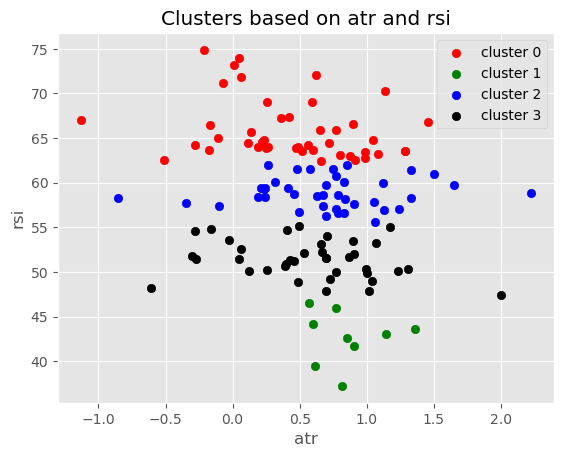

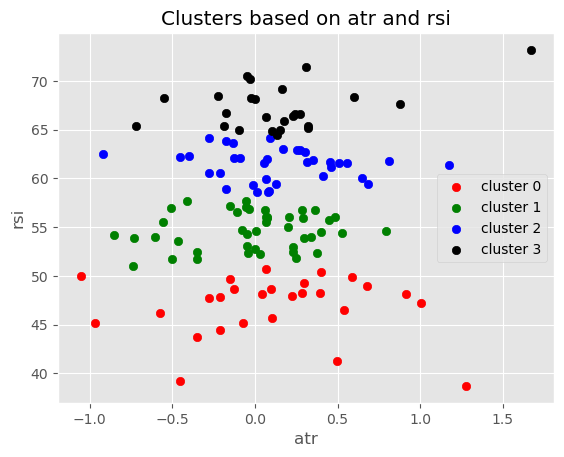

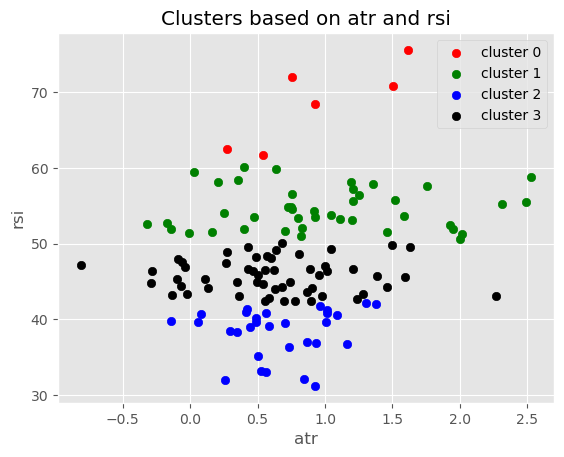

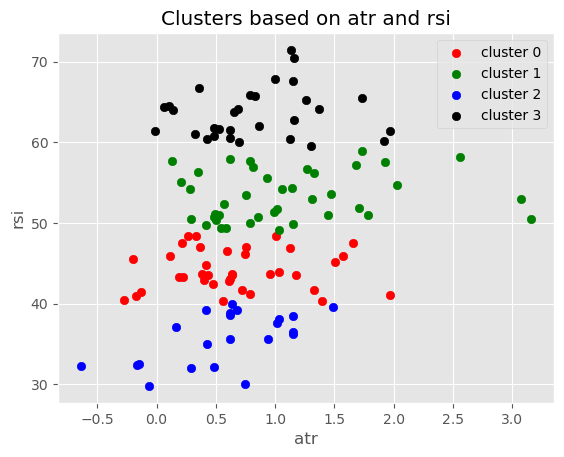

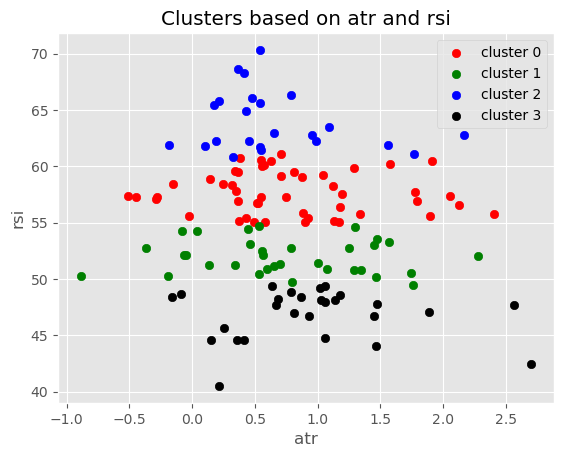

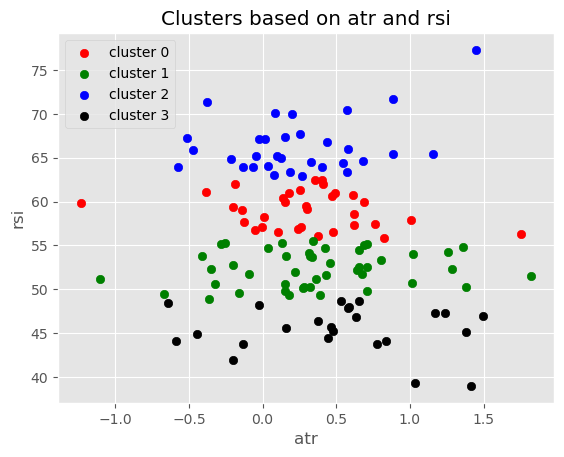

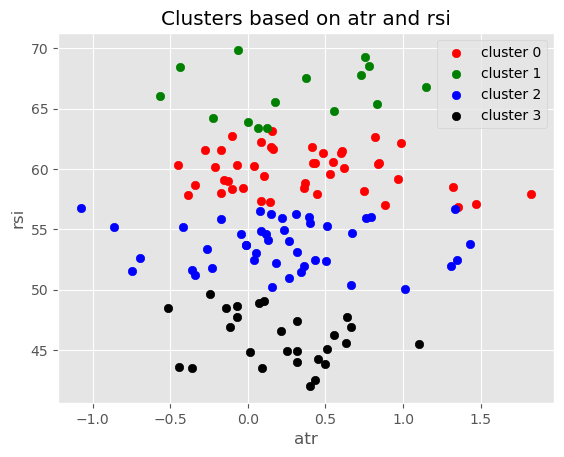

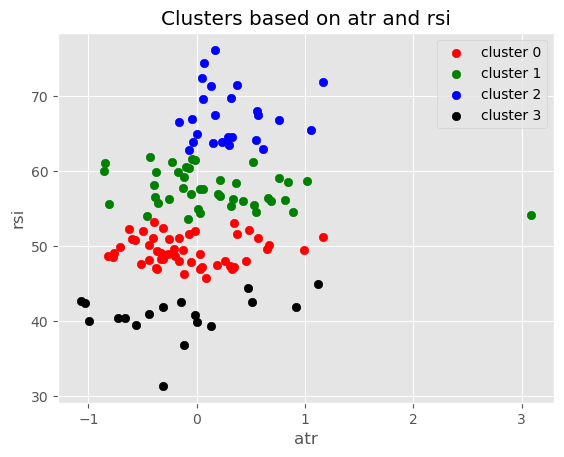

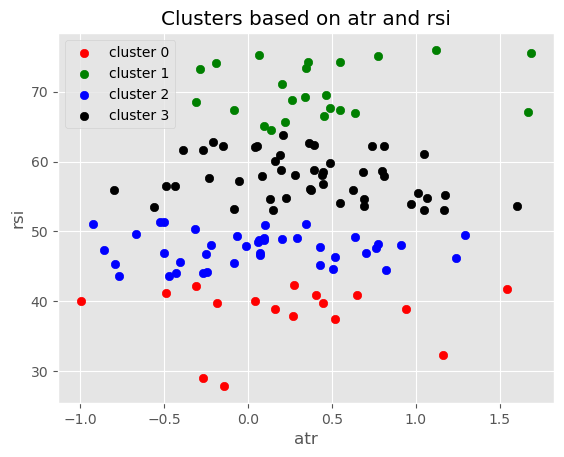

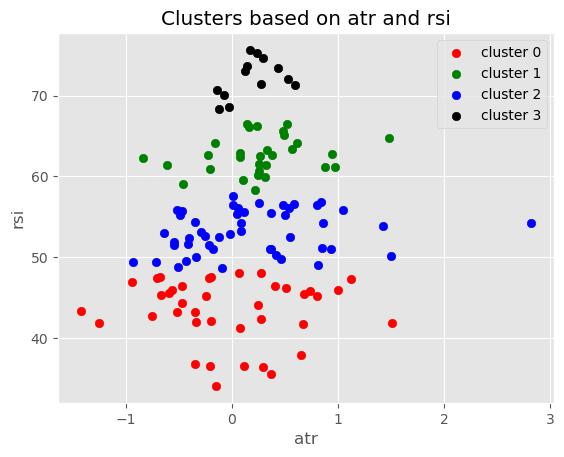

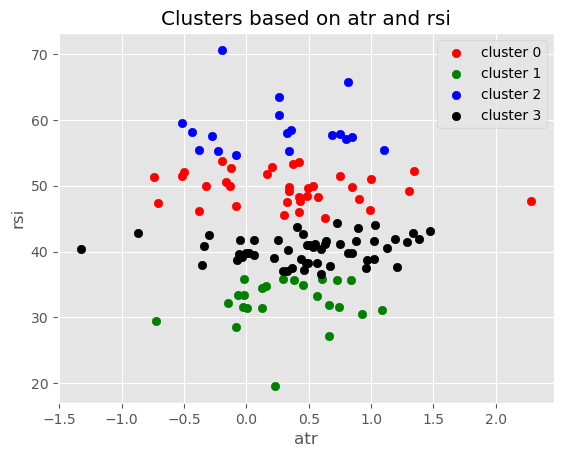

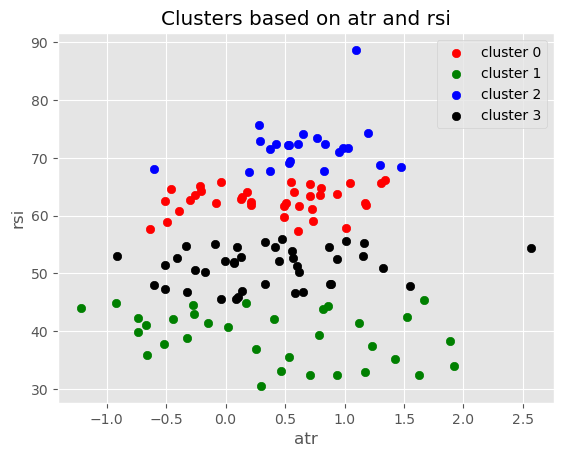

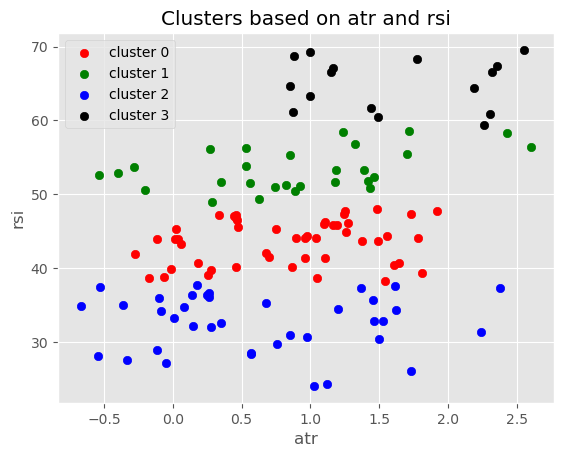

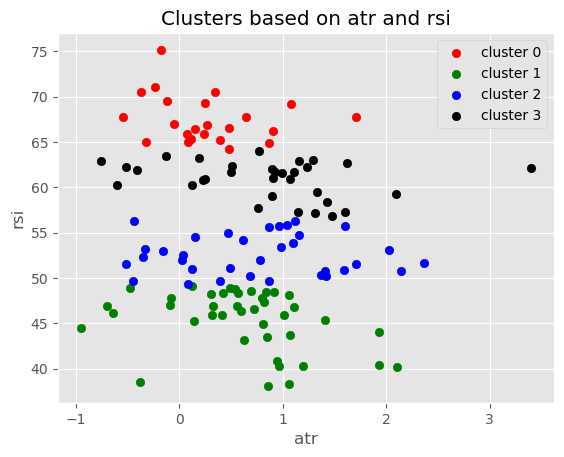

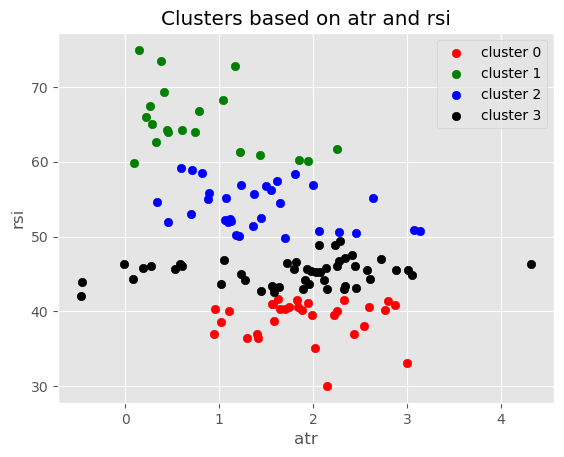

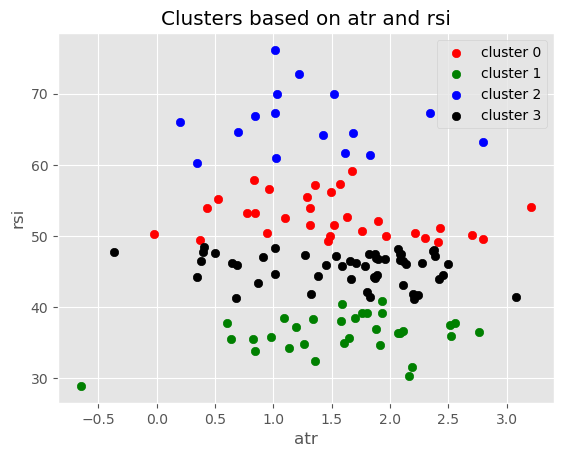

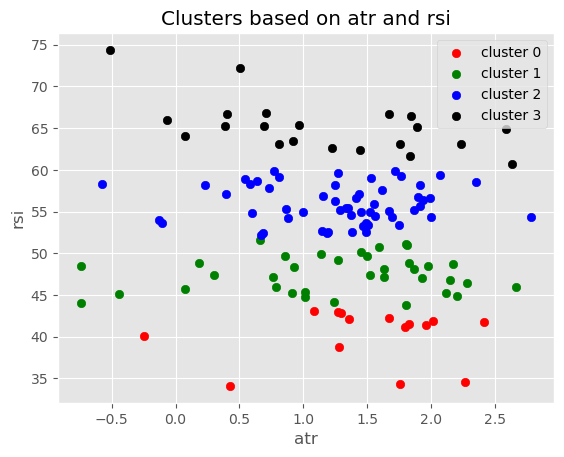

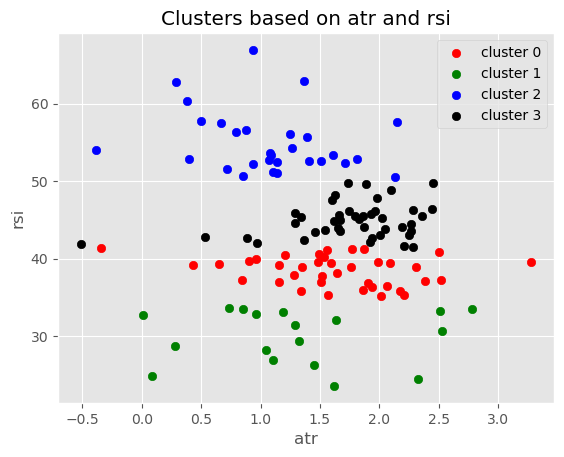

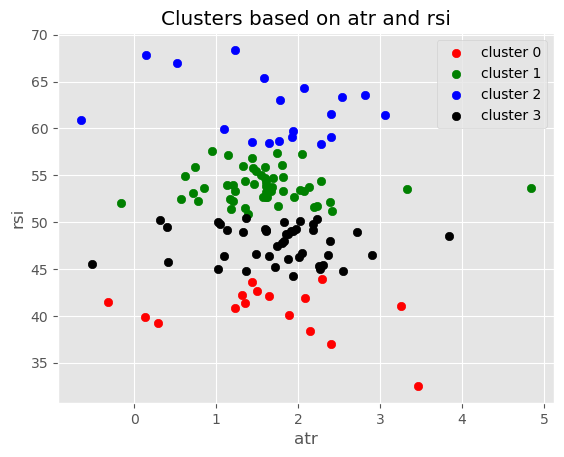

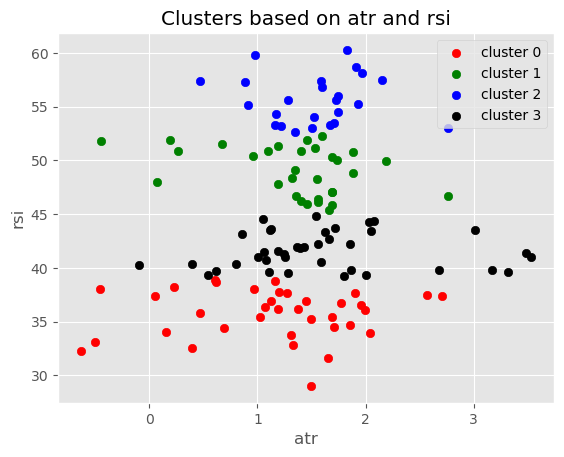

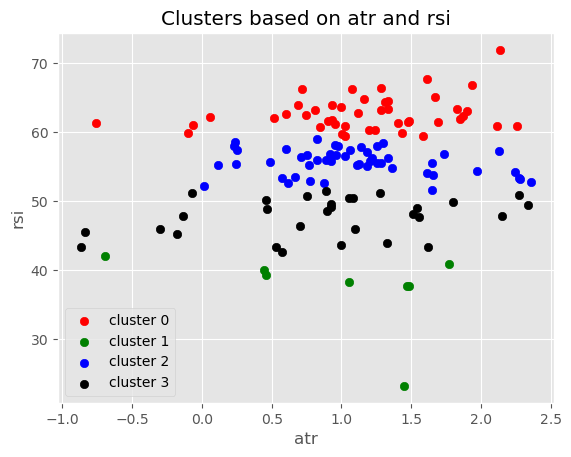

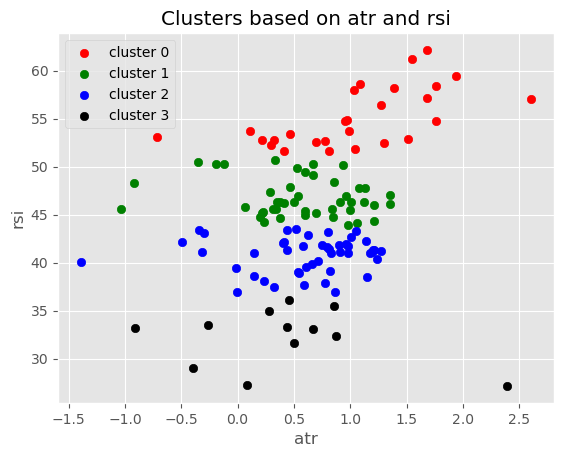

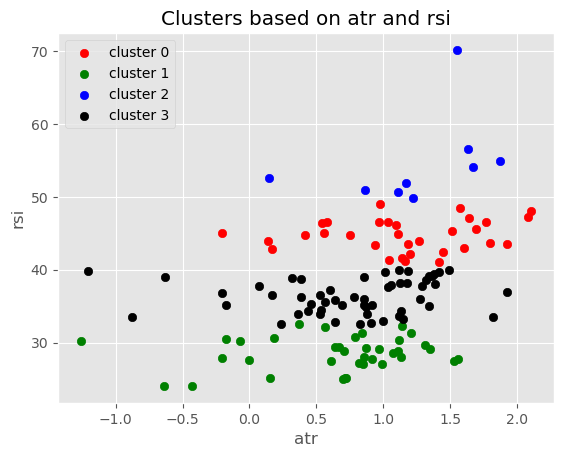

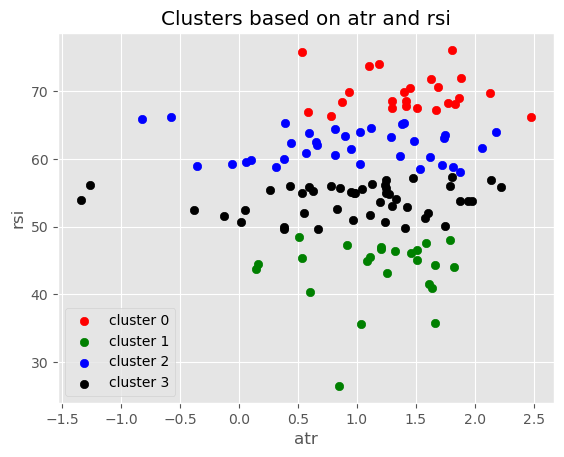

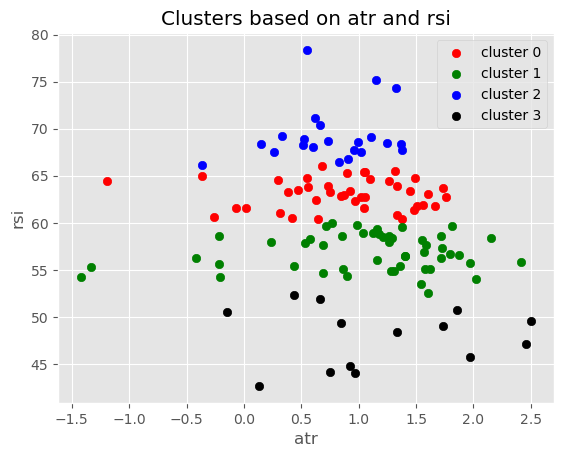

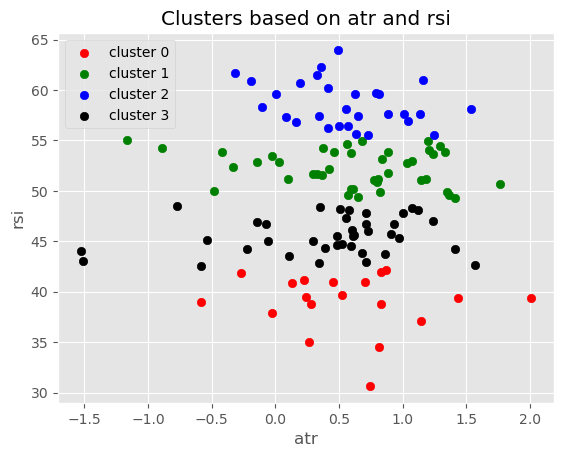

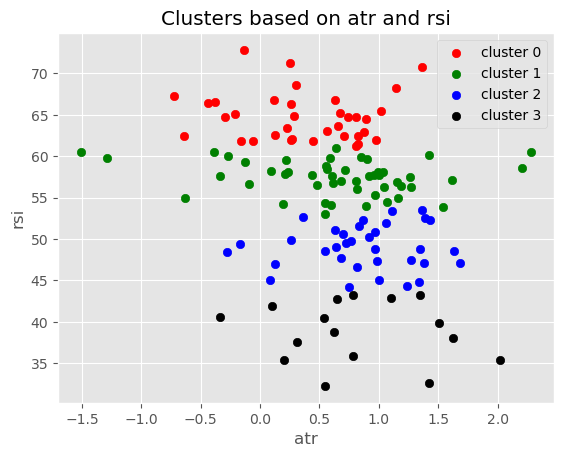

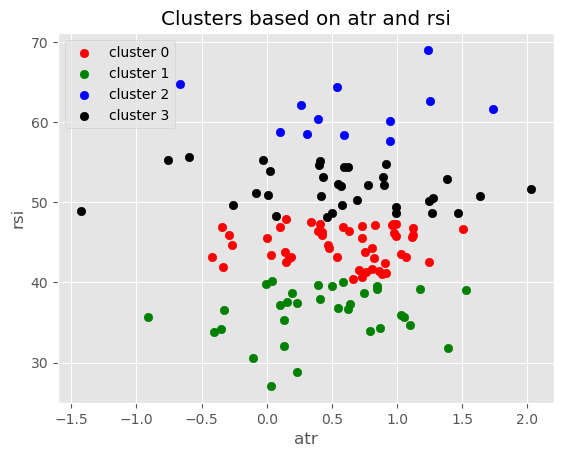

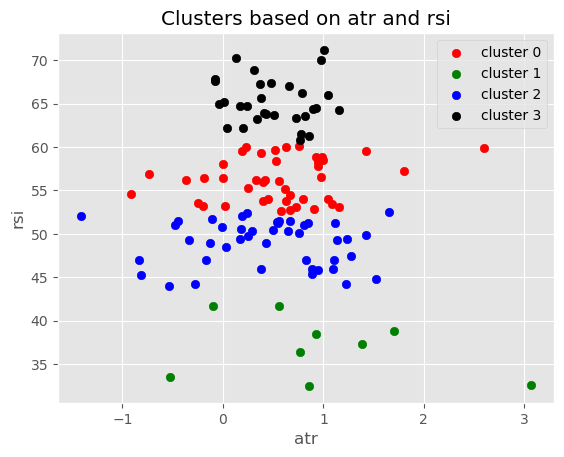

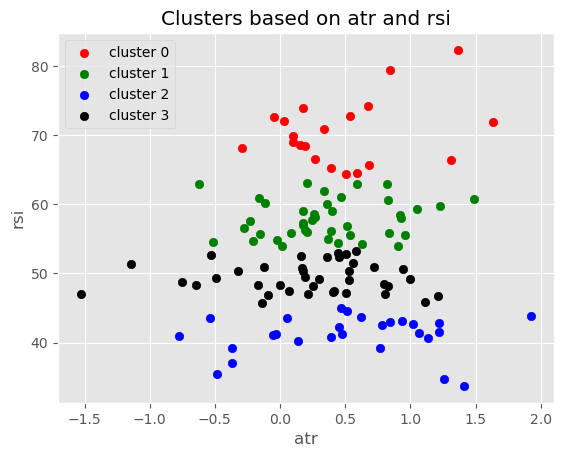

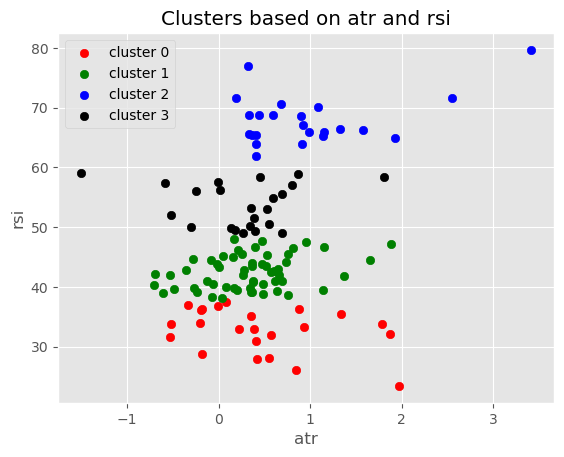

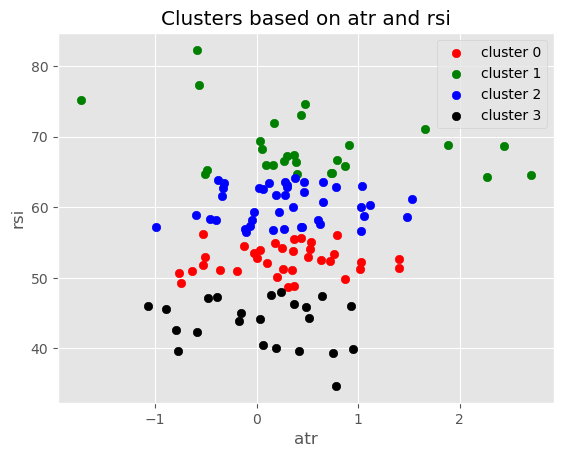

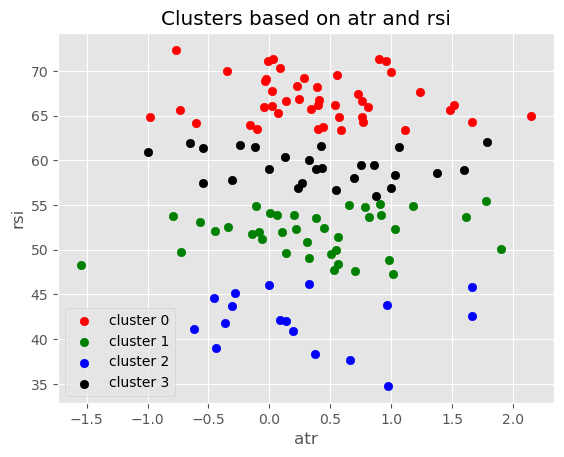

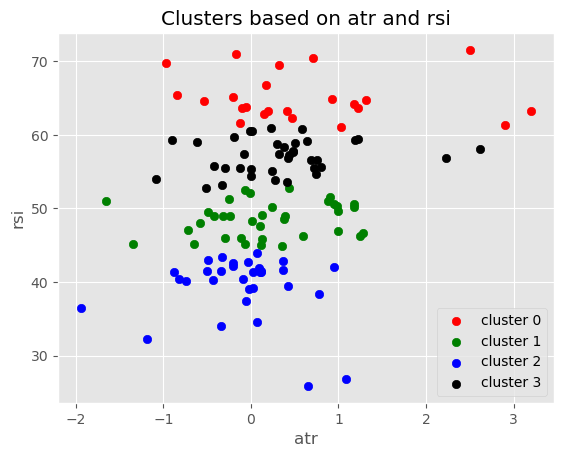

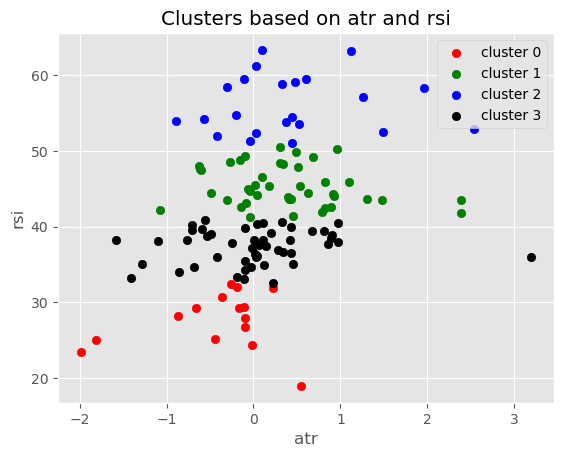

In [24]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

.
# Apply pre-defined Centriods

In [25]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [26]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2016-11-30 AAL             0.000189  71.397570  3.656155  3.770906  3.885658   
           AAPL           -0.002422  48.015349  3.251985  3.281053  3.310121   
           ABBV           -0.039654  49.727663  3.740504  3.814687  3.888870   
           ABT            -0.007707  39.665490  3.539788  3.576250  3.612712   
           ACN            -0.005559  54.807739  4.655544  4.679425  4.703306   
...                             ...        ...       ...       ...       ...   
2023-09-30 WBA            -0.000136  25.028834  3.021828  3.133713  3.245598   
           WFC             0.000136  40.920287  3.709473  3.749849  3.790225   
           WMT             0.000024  54.722508  5.081613  5.099300  5.116986   
           XOM             0.000068  59.440186  4.704273  4.744375  4.784477   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2016-11-30 AAL     0.263773  2.344164   0.146730   0.127700   0.086493   
           AAPL   -1.011998 -0.314781  -0.021601  -0.008718   0.015430   
           ABBV   -0.617478 -0.257987   0.089997  -0.013645  -0.014453   
           ABT    -0.981659 -0.575623  -0.029817  -0.048193  -0.030325   
           ACN    -0.928960  0.031425   0.027443  -0.006148   0.016178   
...                     ...       ...        ...        ...        ...   
2023-09-30 WBA    -1.813421 -1.474186  -0.461367  -0.267373  -0.130532   
           WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           WMT    -0.196379  0.399459  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2016-11-30 AAL      0.065515   0.014886    0.010841  1.358397  1.041565   
           AAPL     0.018834   0.016838   -0.003828  1.116546 -0.228554   
           ABBV    -0.002749   0.015097    0.006898  0.596029  0.161684   
           ABT     -0.004603   0.000125   -0.011648  0.852125 -0.250181   
           ACN      0.002371   0.021900    0.010712  1.170419 -0.148991   
...                      ...        ...         ...       ...       ...   
2023-09-30 WBA     -0.109701  -0.099794   -0.078203  0.252998 -0.696590   
           WFC      0.016712   0.000702    0.003255  1.137640  0.314483   
           WMT      0.017574   0.016553    0.020256  0.740059 -0.261914   
           XOM      0.012838   0.008747    0.027037  1.004028 -1.054568   
           MRNA    -0.071952  -0.064976   -0.015431  1.155109  0.761331   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2016-11-30 AAL     0.746893  0.140442  0.798648        3  
           AAPL   -0.607443  0.634582 -0.074088        1  
           ABBV    0.108146 -0.174110 -0.036492        1  
           ABT    -0.503838  0.123233  0.906605        0  
           ACN    -0.292459  0.246776  0.094523        2  
...                     ...       ...       ...      ...  
2023-09-30 WBA    -0.827678 -0.659032  3.303480        0  
           WFC     2.009074 -0.404336 -1.468839        1  
           WMT    -0.522596 -0.126427  0.642566        2  
           XOM     1.707982 -0.677021 -0.287258        3  
           MRNA   -1.164605  0.589836  0.992841        1  

[10554 rows x 19 columns]

In [27]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')

    plt.legend()
    plt.show()
    return


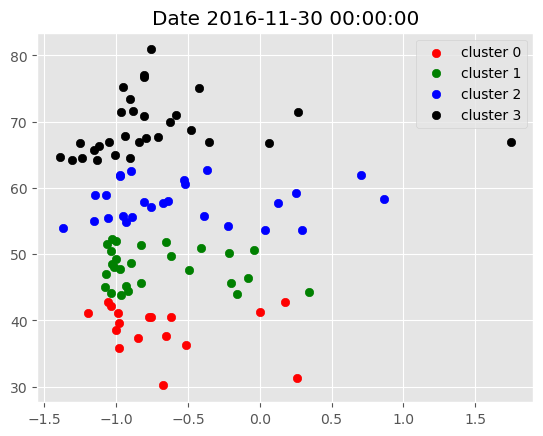

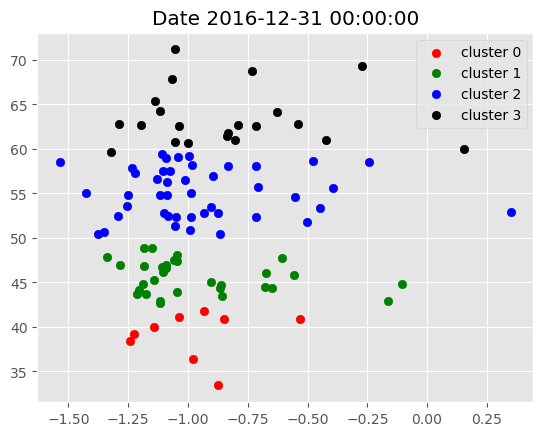

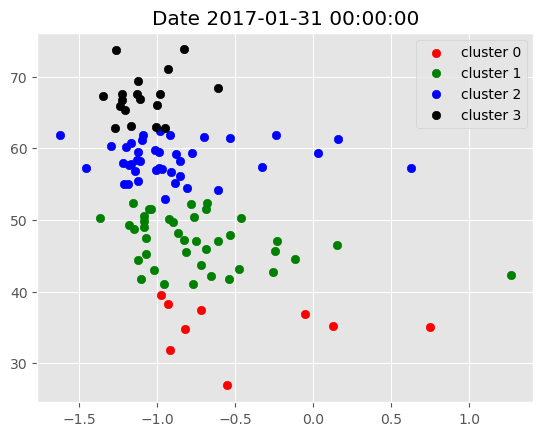

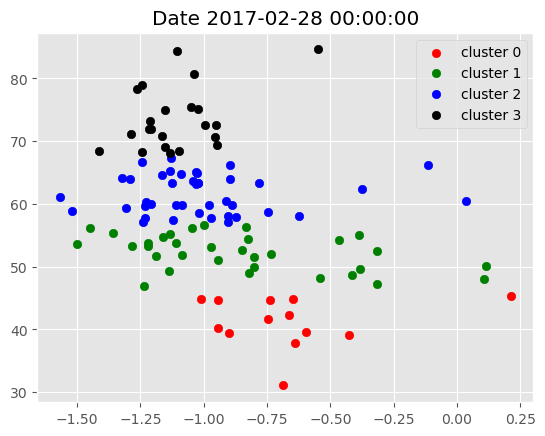

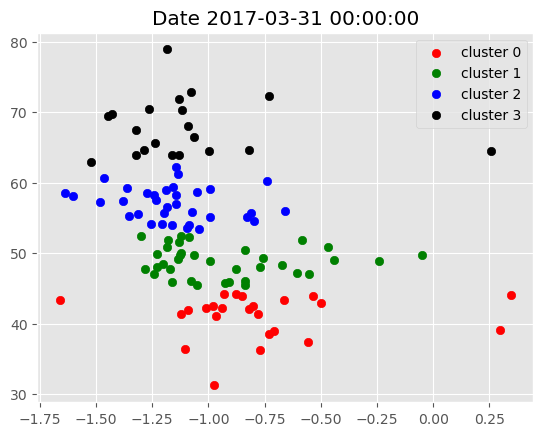

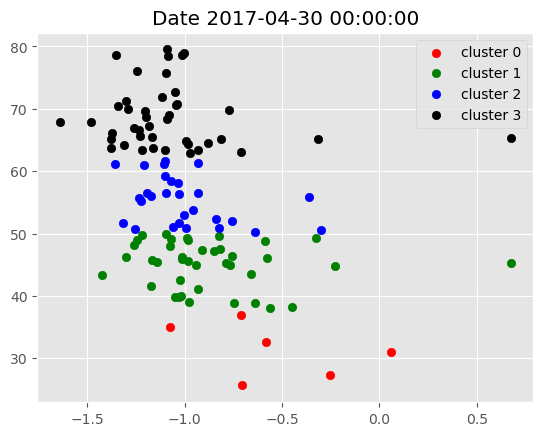

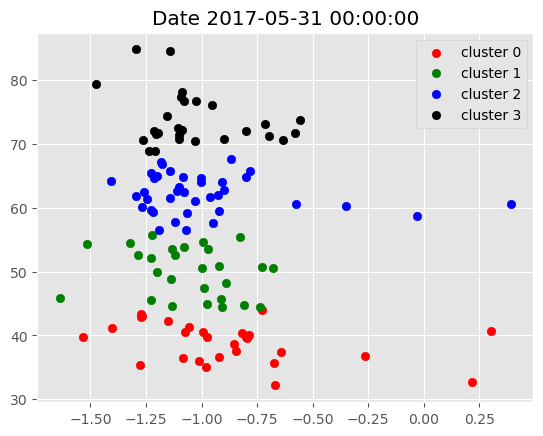

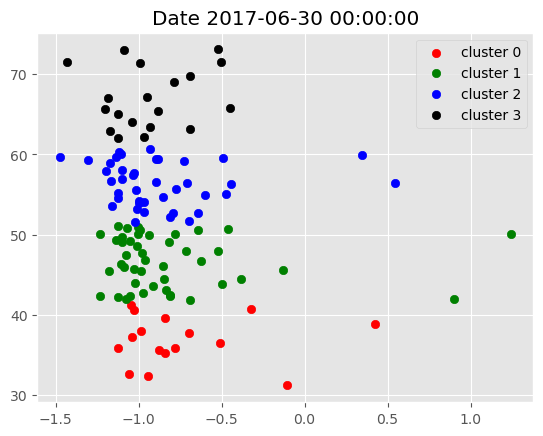

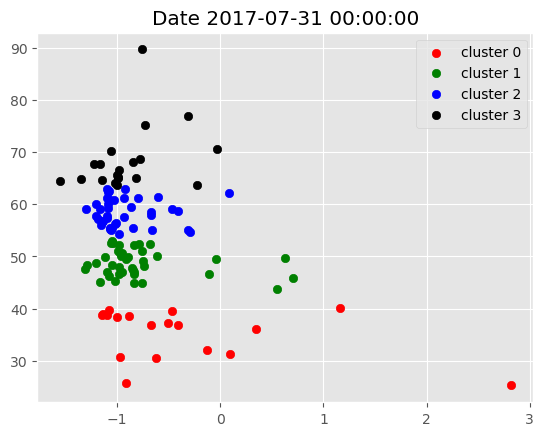

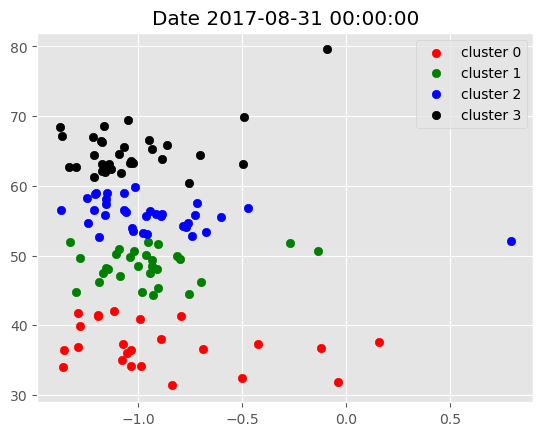

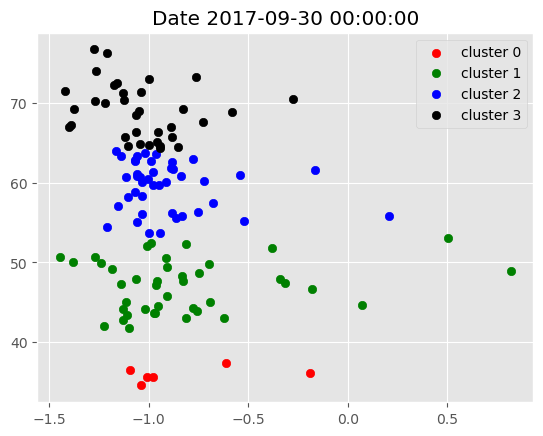

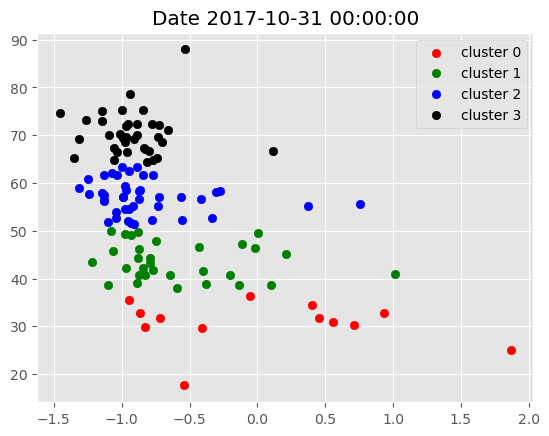

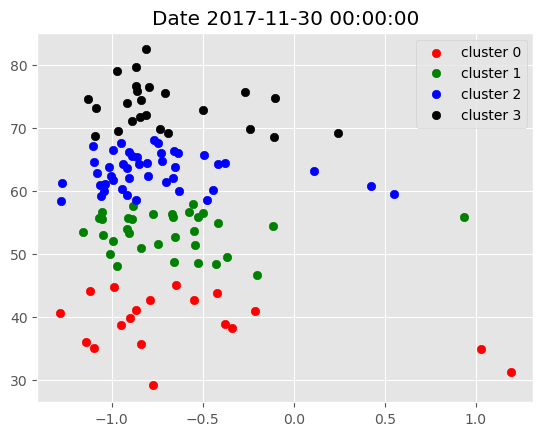

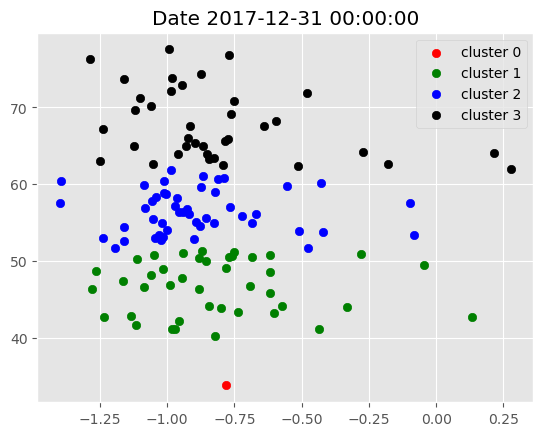

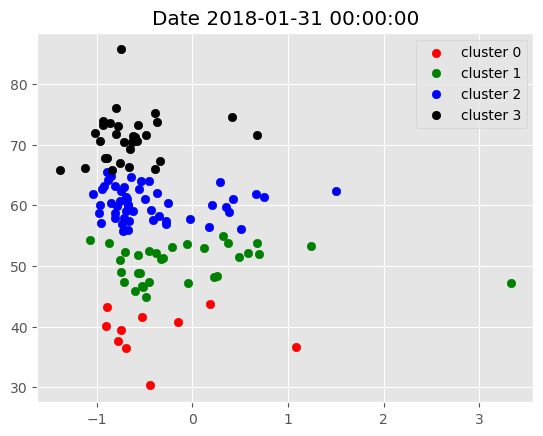

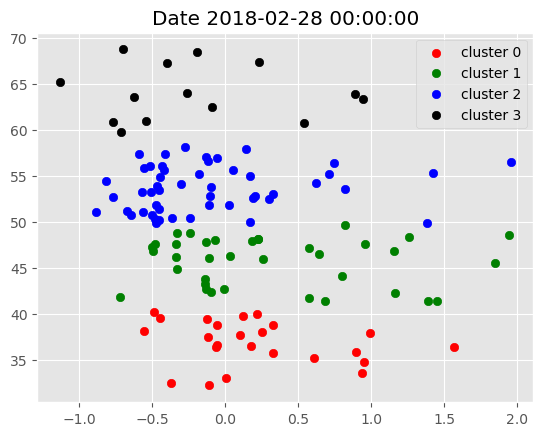

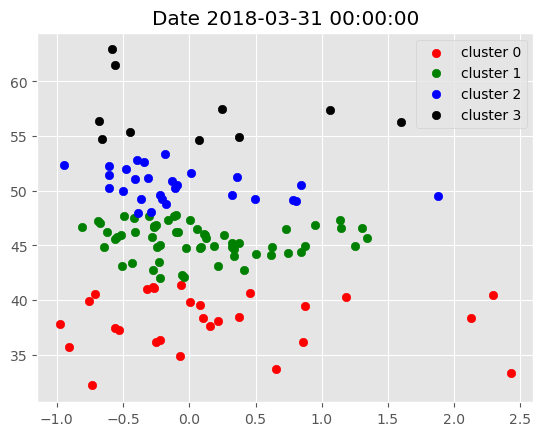

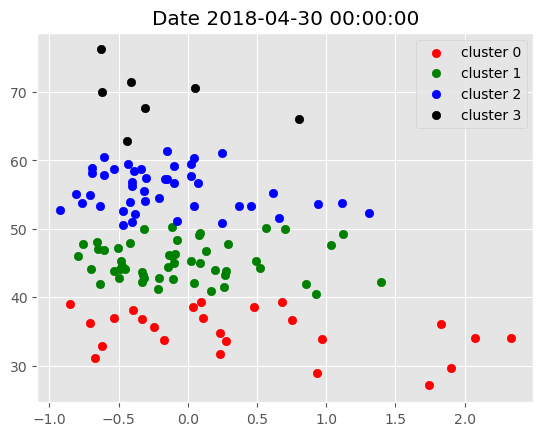

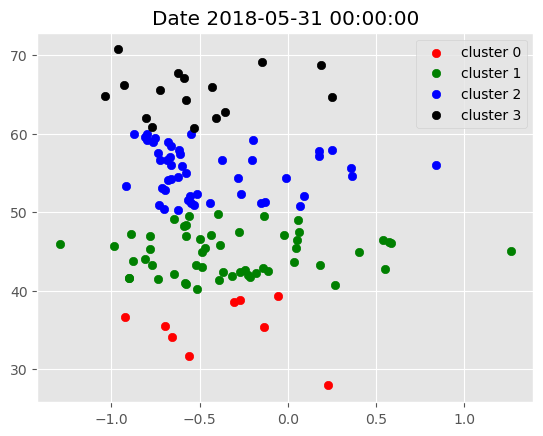

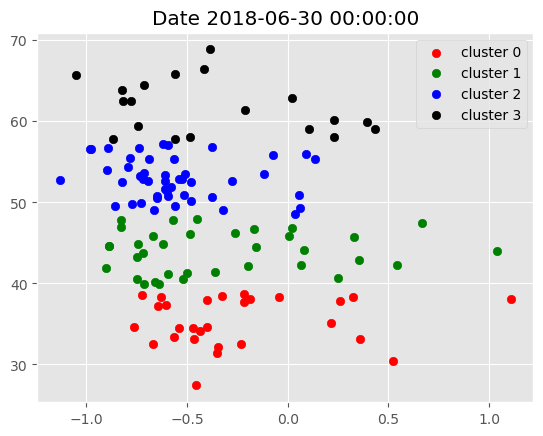

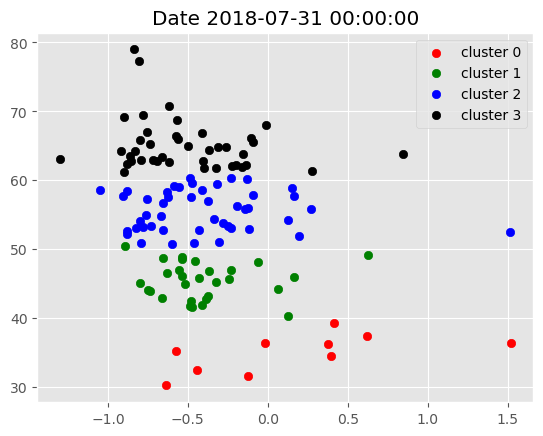

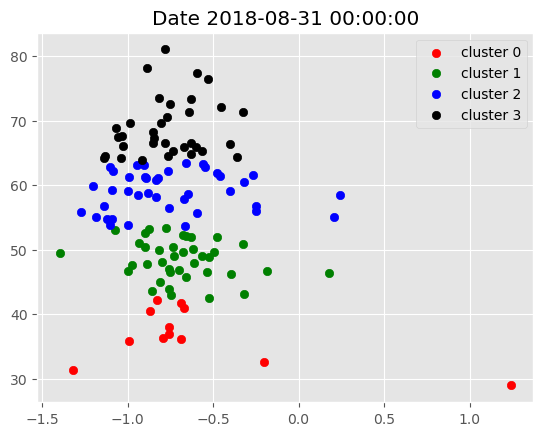

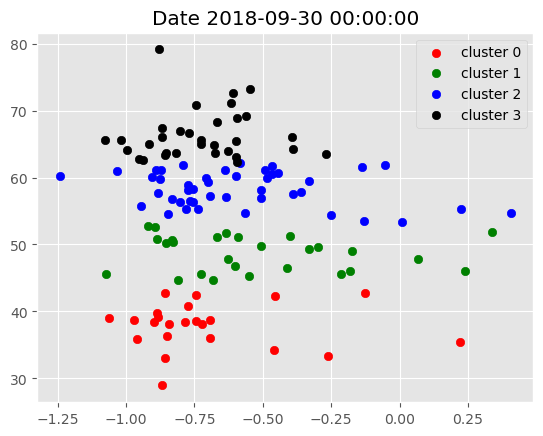

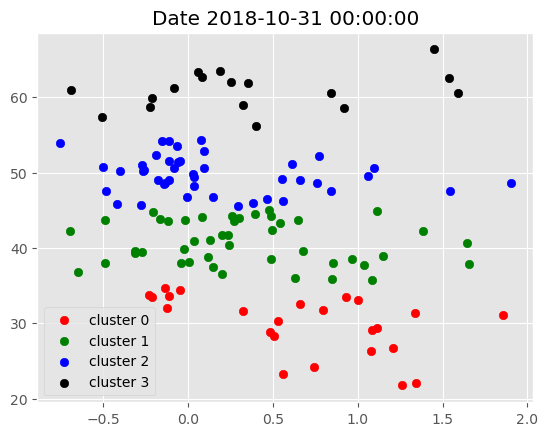

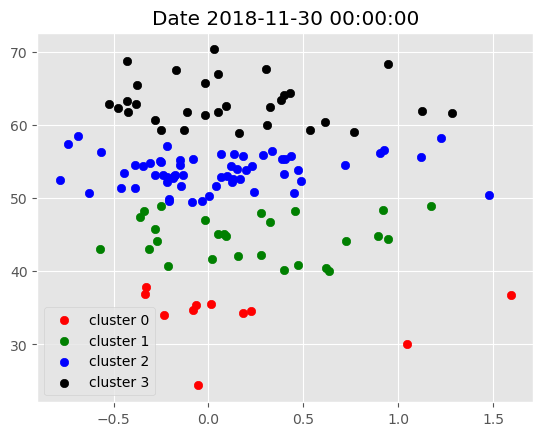

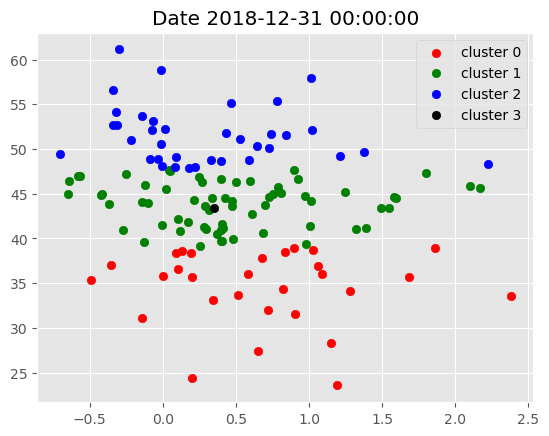

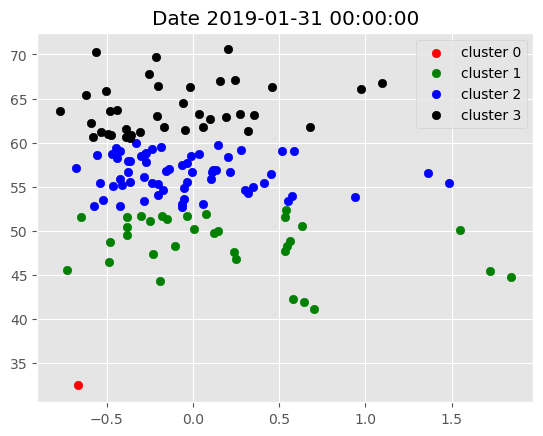

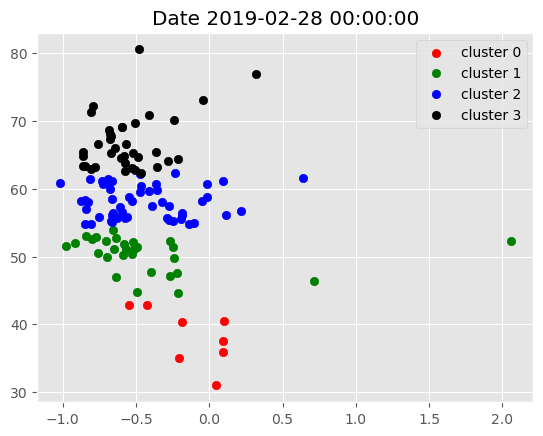

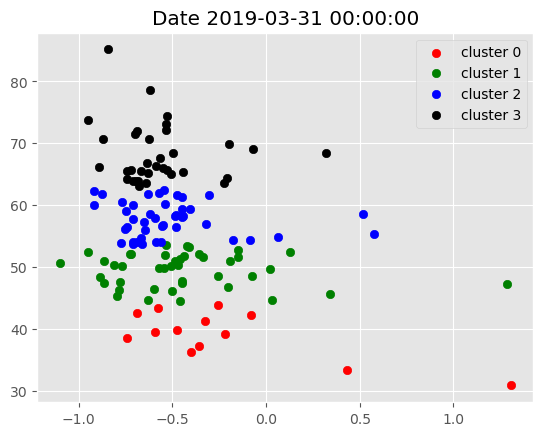

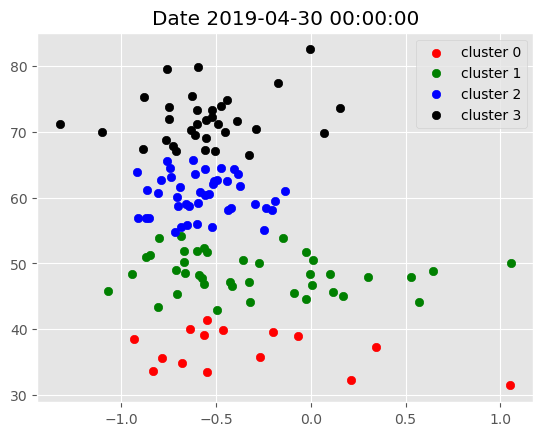

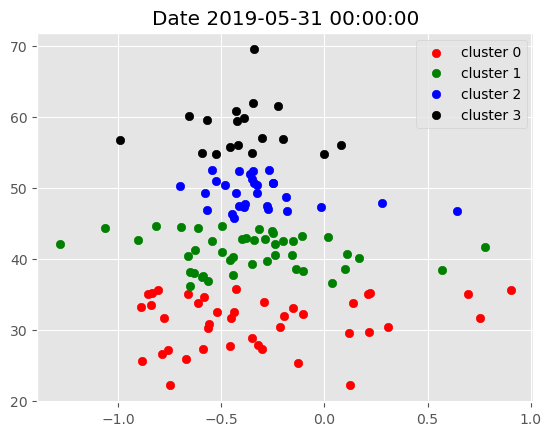

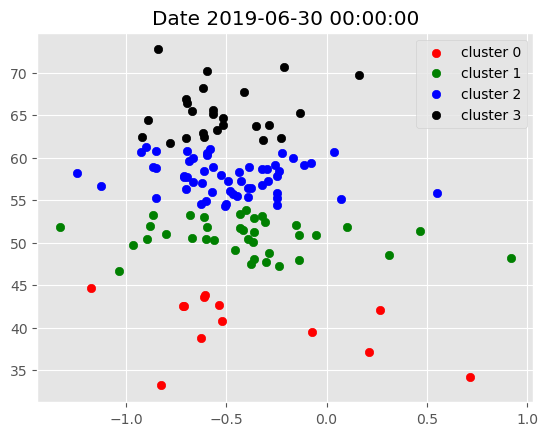

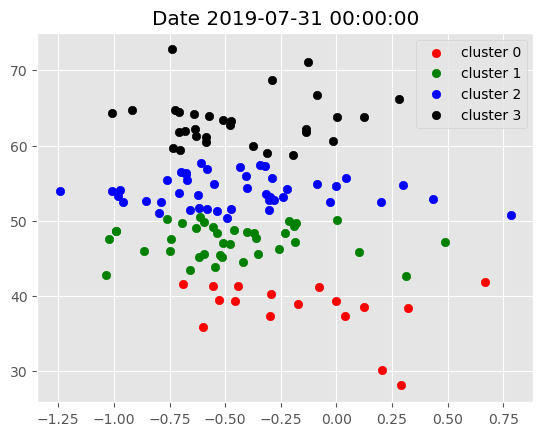

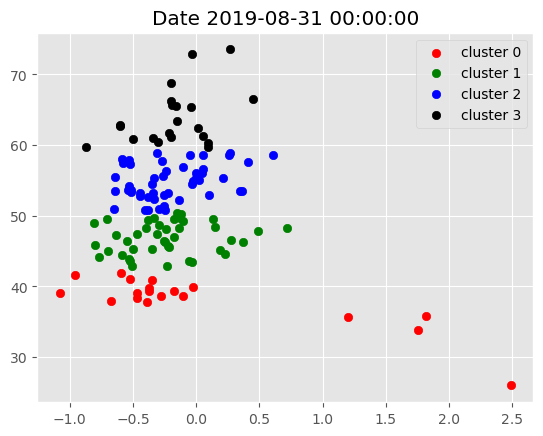

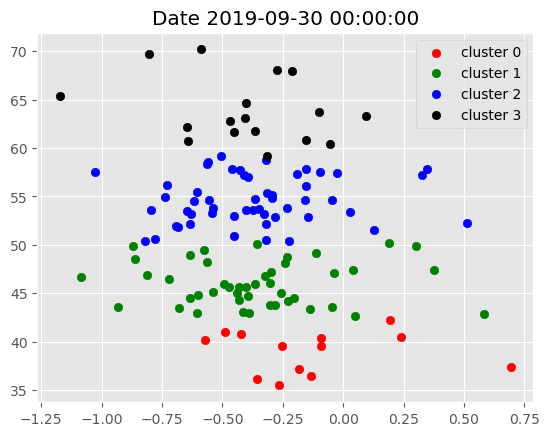

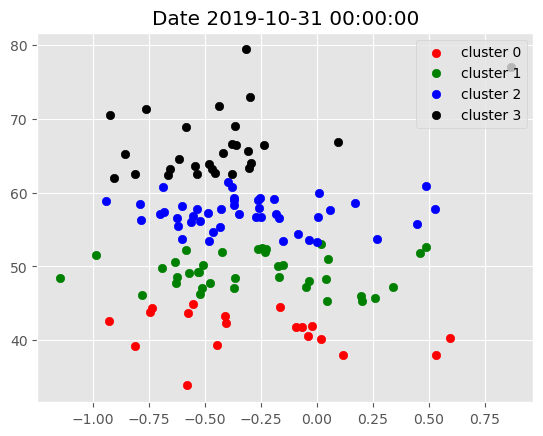

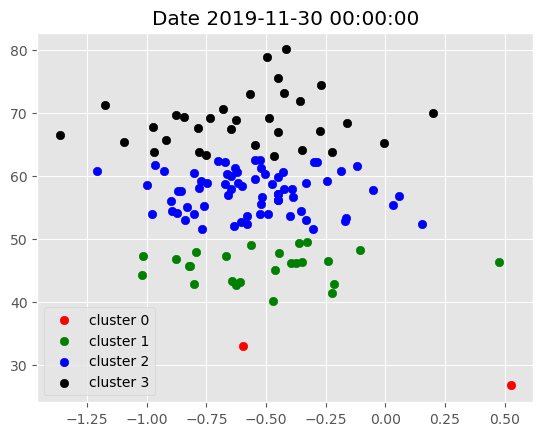

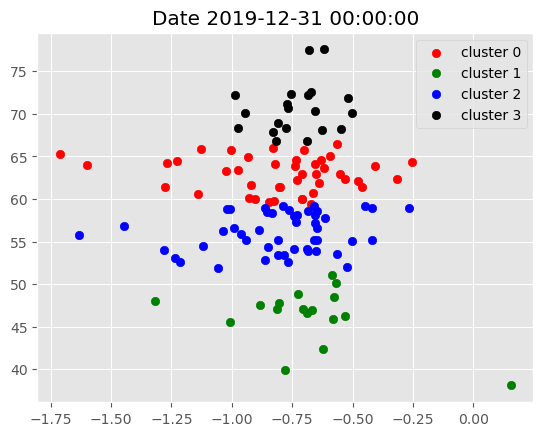

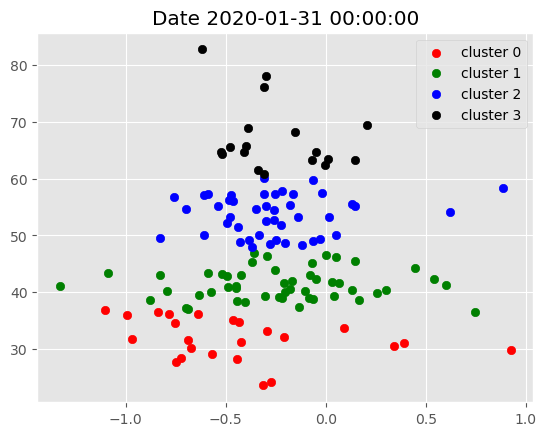

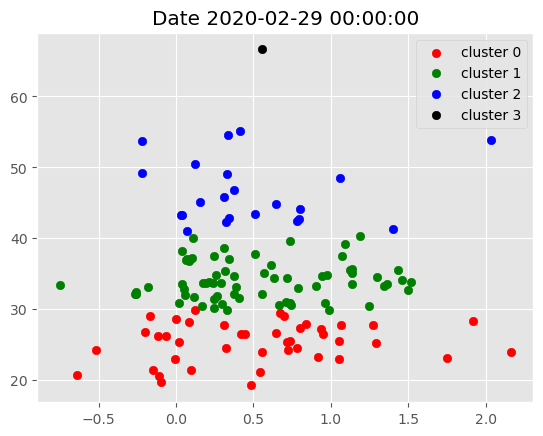

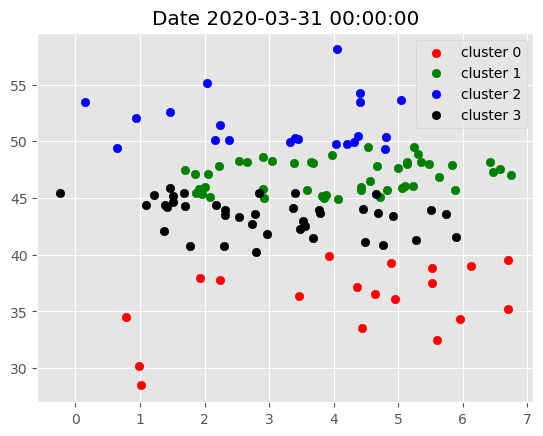

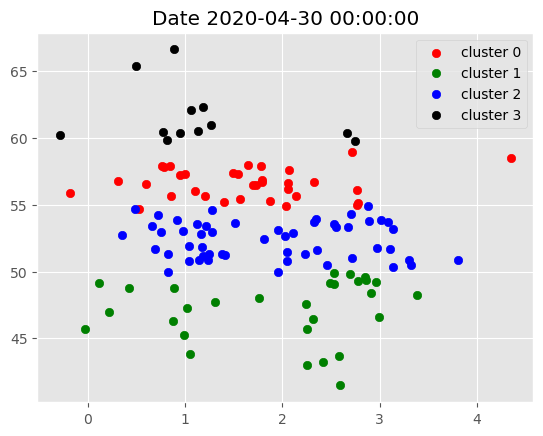

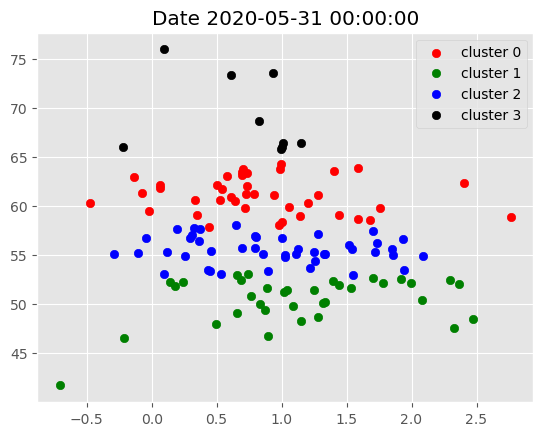

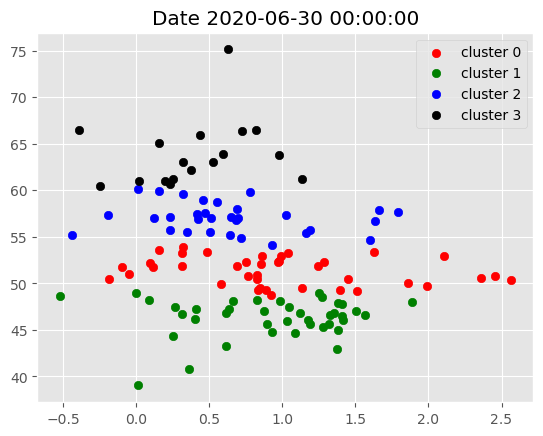

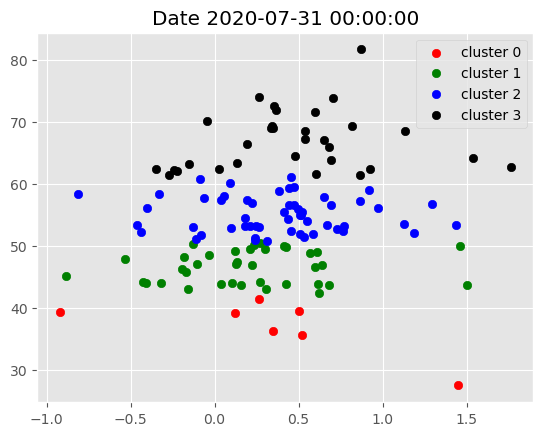

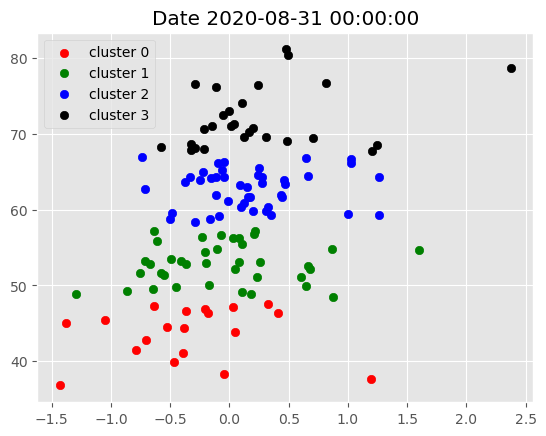

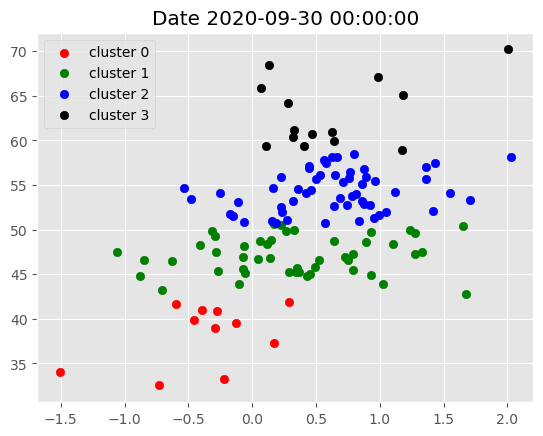

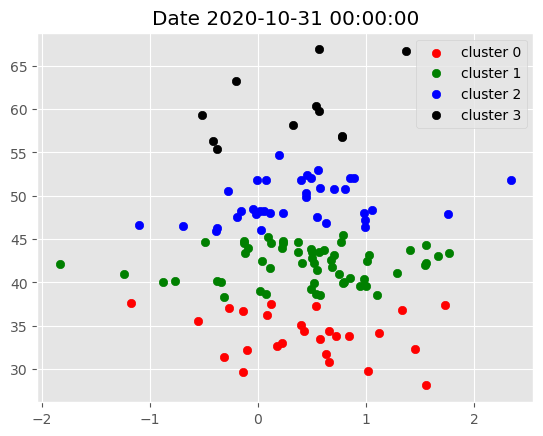

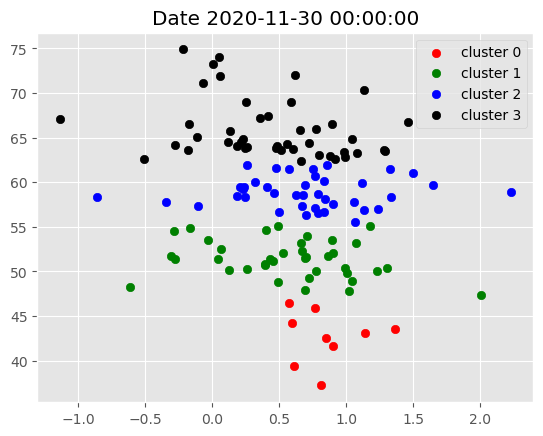

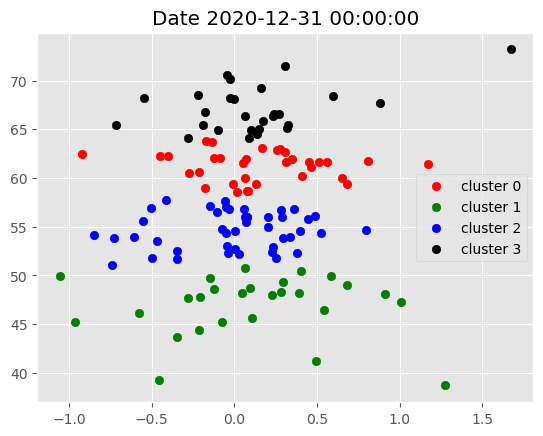

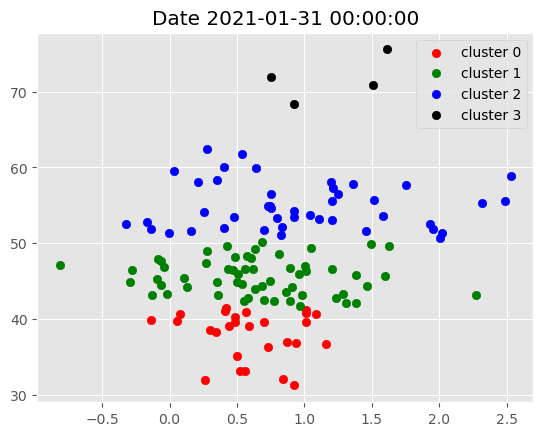

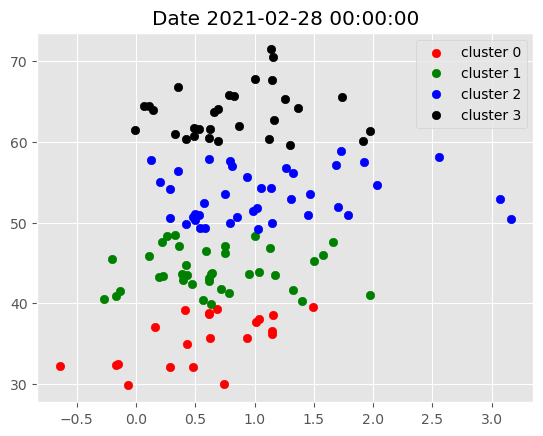

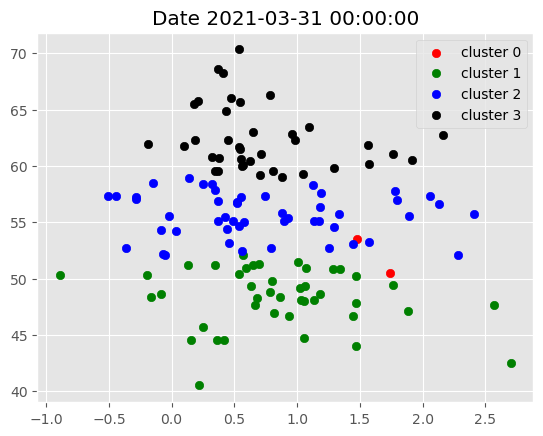

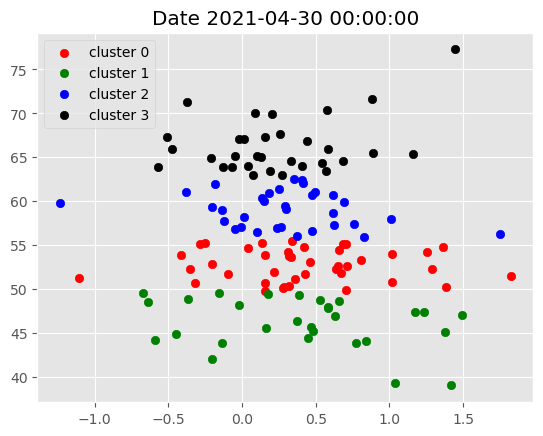

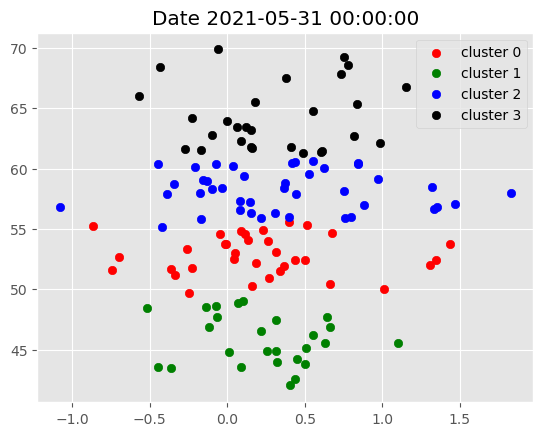

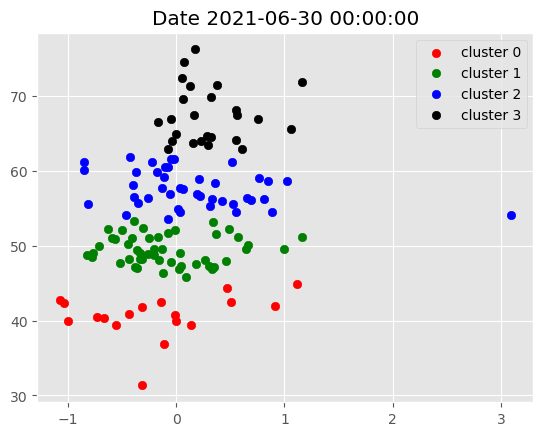

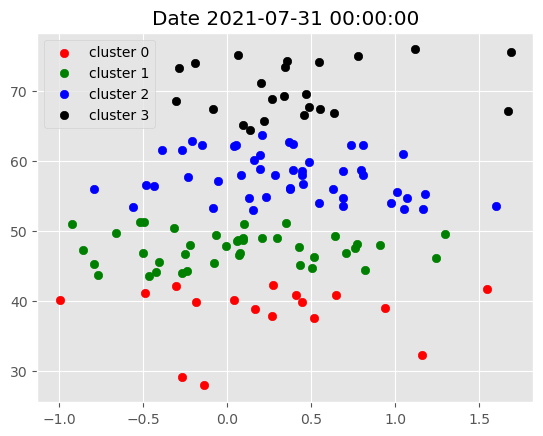

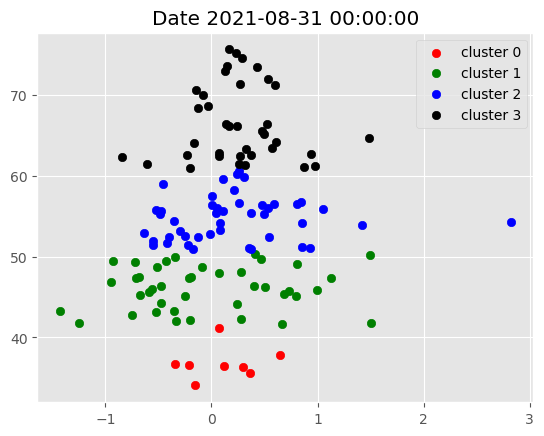

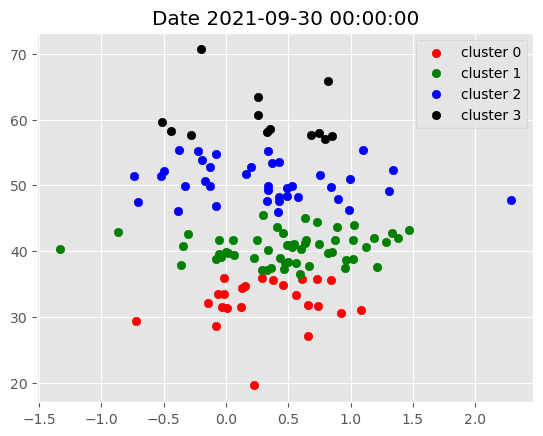

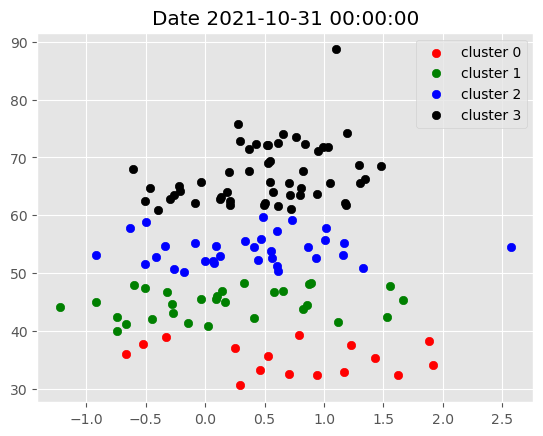

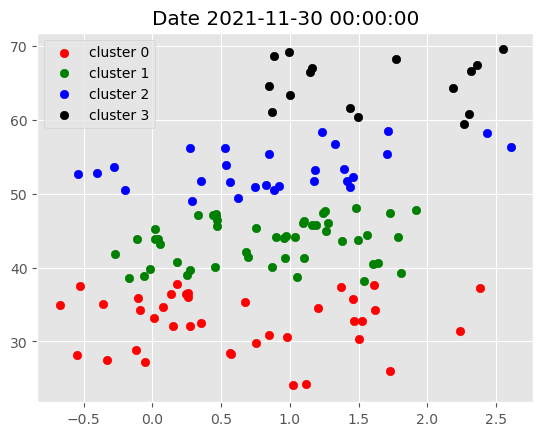

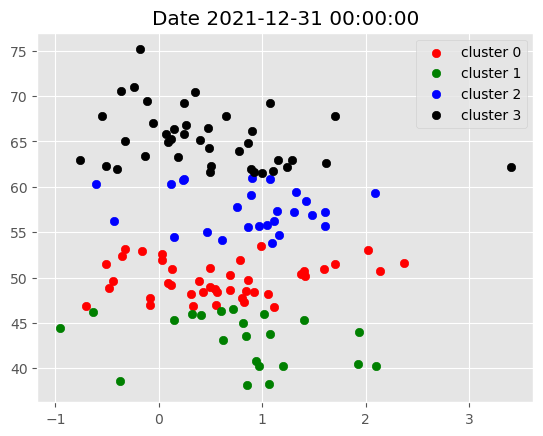

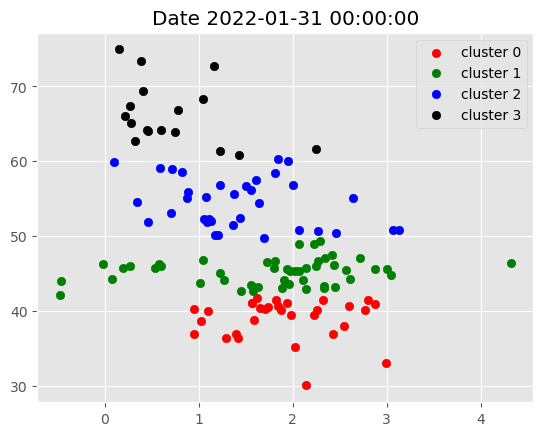

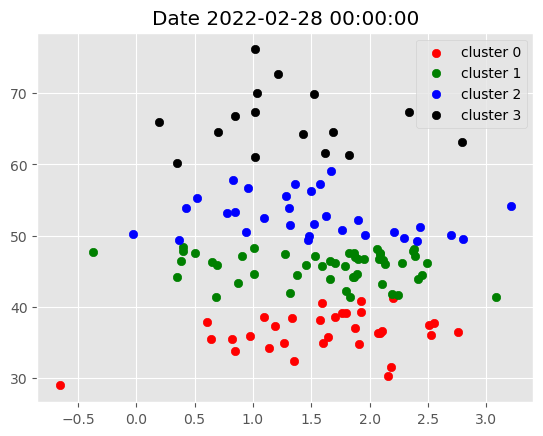

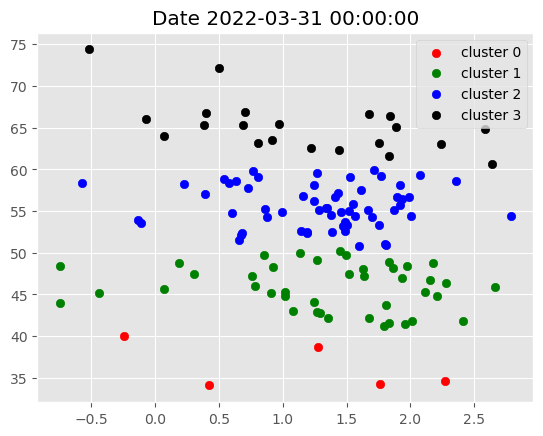

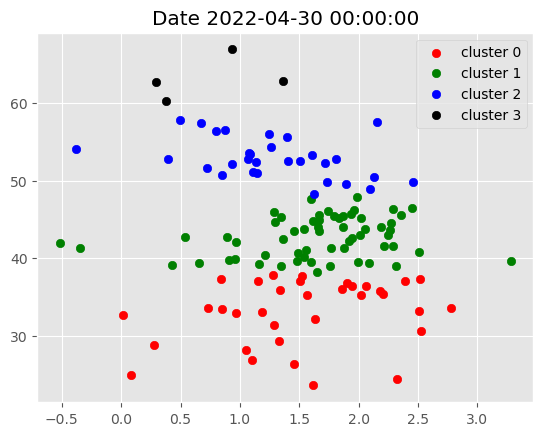

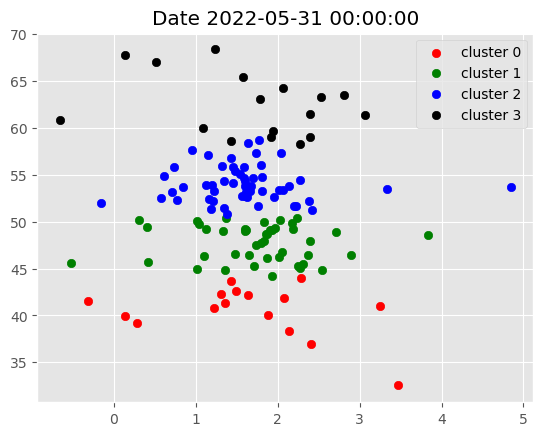

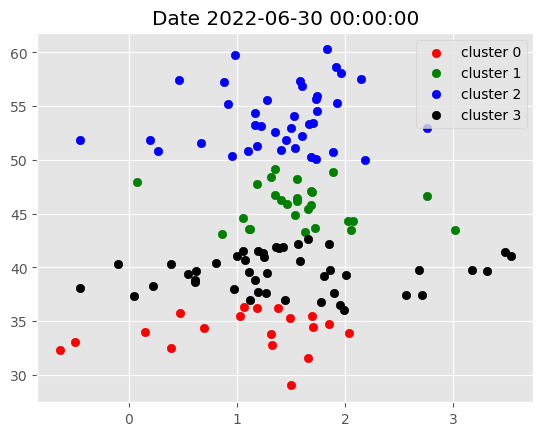

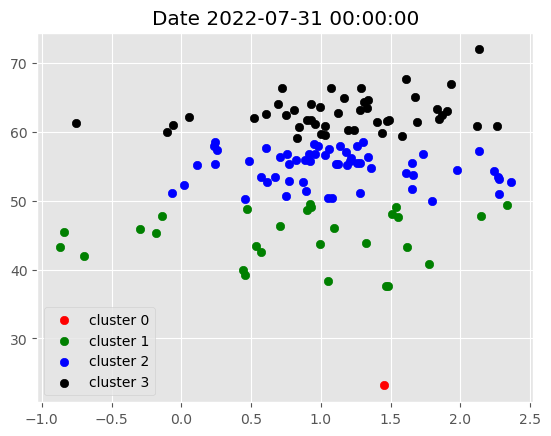

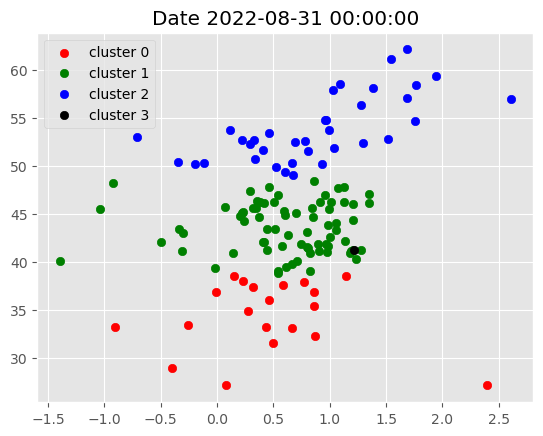

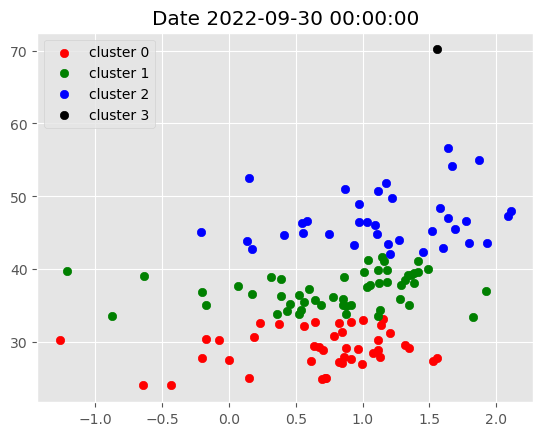

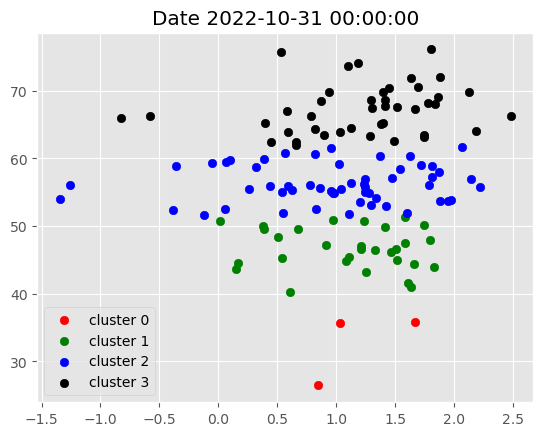

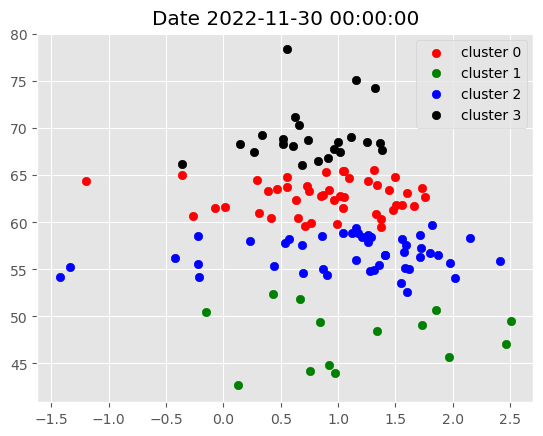

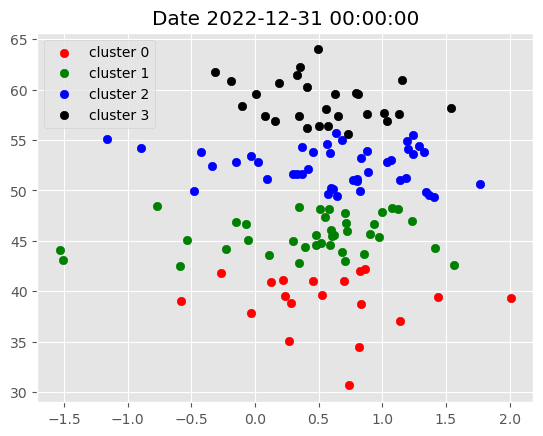

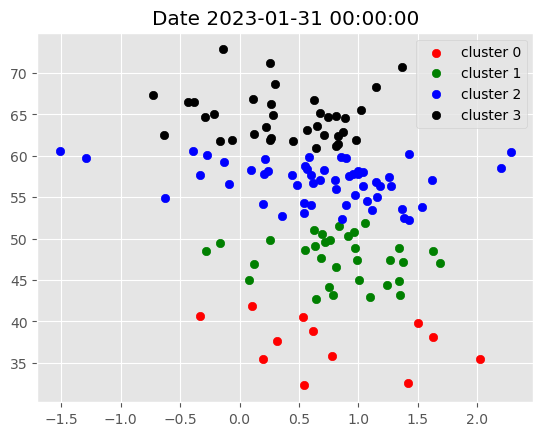

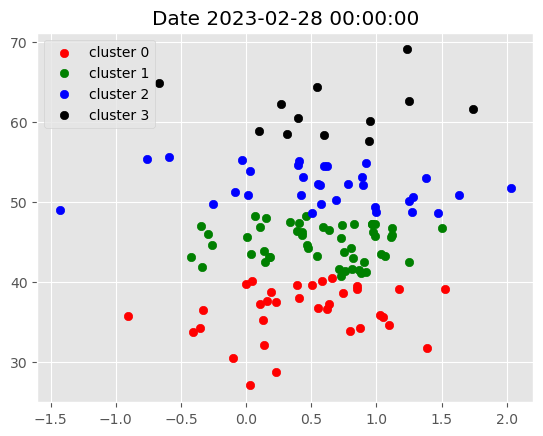

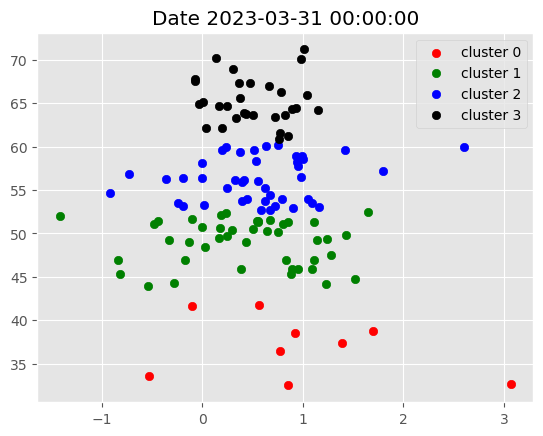

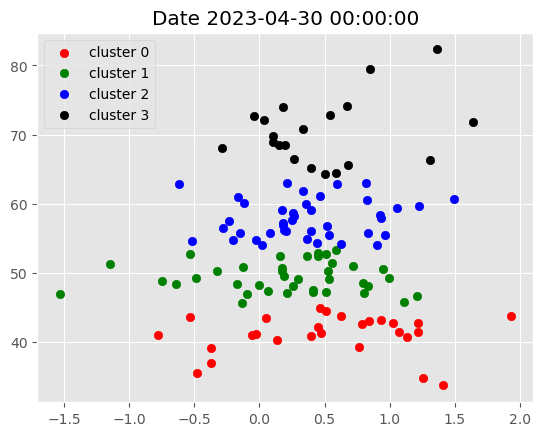

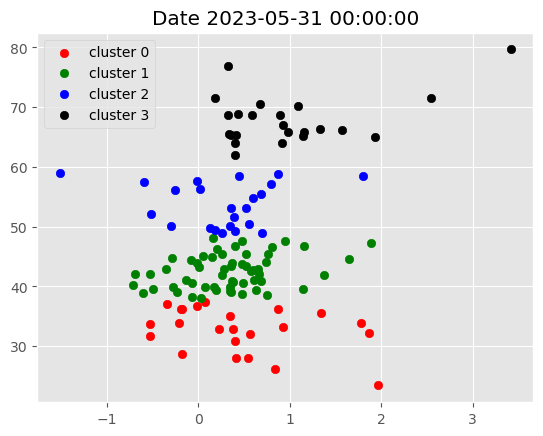

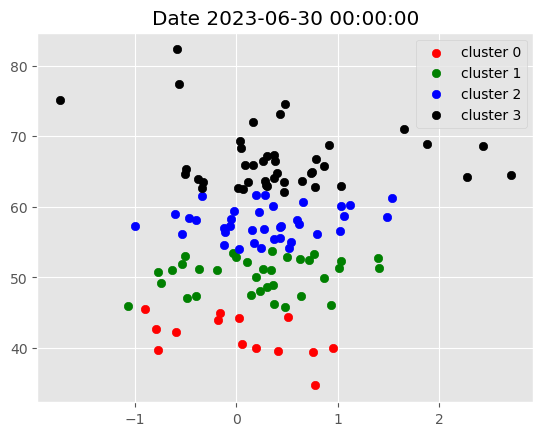

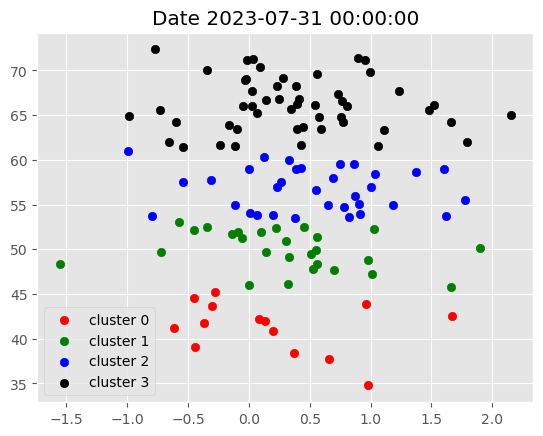

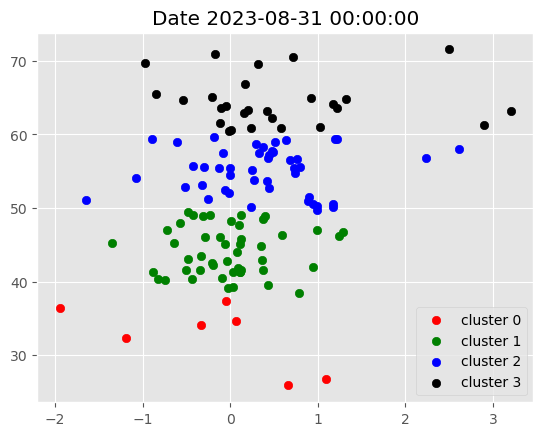

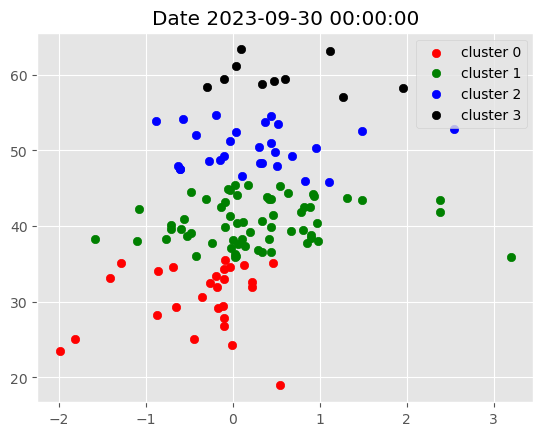

In [28]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [29]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

## 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
* First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

* Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.



In [30]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {} # declare dictionary

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2016-12-01': ['AAL',
  'AXP',
  'BA',
  'BAC',
  'BRK-B',
  'C',
  'CAT',
  'CMCSA',
  'CVX',
  'DAL',
  'DD',
  'DIS',
  'FCX',
  'GS',
  'HAL',
  'JPM',
  'LMT',
  'LUV',
  'MS',
  'MU',
  'NVDA',
  'SBUX',
  'SCHW',
  'TGT',
  'TXN',
  'UAL',
  'UNH',
  'UNP',
  'USB',
  'WFC'],
 '2017-01-01': ['BA',
  'BAC',
  'C',
  'CVX',
  'DIS',
  'GS',
  'HAL',
  'JPM',
  'LUV',
  'MMM',
  'MO',
  'MS',
  'MU',
  'NVDA',
  'SCHW',
  'T',
  'TSLA',
  'UAL',
  'USB',
  'VLO',
  'VZ'],
 '2017-02-01': ['AAPL',
  'ABT',
  'ADBE',
  'AVGO',
  'CHTR',
  'CMCSA',
  'CRM',
  'DE',
  'DHR',
  'DIS',
  'META',
  'MO',
  'MU',
  'NFLX',
  'PG',
  'PM',
  'TMO',
  'TSLA'],
 '2017-03-01': ['AAPL',
  'ABT',
  'AMGN',
  'BA',
  'BKNG',
  'BRK-B',
  'COST',
  'CSCO',
  'HD',
  'HON',
  'JNJ',
  'LLY',
  'MCD',
  'MDT',
  'MMM',
  'MO',
  'NXPI',
  'ORCL',
  'PEP',
  'PFE',
  'PM',
  'V'],
 '2017-04-01': ['AAPL',
  'ADBE',
  'AMAT',
  'AMZN',
  'BKNG',
  'CMG',
  'DIS',
  'MCD',
  'META',
  'MMM',
  'MU',
  '

## Define portfolio optimization function
* We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

* To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

* Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()


* Download fresh daily data only for short listed stocks 

In [32]:
stocks = data.index.get_level_values('ticker').unique().tolist()
new_df= yf.download(tickers= stocks,
                    start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12)
                    ,end=data.index.get_level_values('date').unique()[-1])
new_df

[*********************100%%**********************]  156 of 156 completed


Adj Close                                                 \
                  AAL        AAPL        ABBV        ABT         ACN   
Date                                                                   
2015-11-30  39.429932   26.924871   41.160301  38.669388   94.345924   
2015-12-01  41.341225   26.706381   41.776119  39.134254   95.146652   
2015-12-02  41.876396   26.465117   40.855930  38.927647   94.671494   
2015-12-03  41.350780   26.219320   39.723408  38.006546   93.210808   
2015-12-04  42.975380   27.091022   40.473713  38.996525   96.000183   
...               ...         ...         ...        ...         ...   
2023-09-25  12.910000  175.848328  153.117371  96.933411  315.680695   
2023-09-26  12.700000  171.733749  152.384705  95.700241  309.327057   
2023-09-27  12.610000  170.205750  151.612442  95.004089  313.081512   
2023-09-28  12.920000  170.465424  150.741165  97.579834  299.527710   
2023-09-29  12.810000  170.984741  147.582764  96.316818  305.841522   

                                                                       ...  \
                  ADBE         ADI         ADP        ADSK        AIG  ...   
Date                                                                   ...   
2015-11-30   91.459999   51.940922   72.652870   63.470001  51.680313  ...   
2015-12-01   92.550003   51.890350   73.747780   64.720001  52.119236  ...   
2015-12-02   92.019997   51.525574   73.200333   64.550003  51.615280  ...   
2015-12-03   89.910004   50.091957   71.810593   64.410004  50.913136  ...   
2015-12-04   92.580002   50.227680   73.638298   65.290001  52.243931  ...   
...                ...         ...         ...         ...        ...  ...   
2023-09-25  511.600006  174.607285  240.020004  205.669998  62.130001  ...   
2023-09-26  506.299988  171.531769  237.240005  201.660004  61.259998  ...   
2023-09-27  502.600006  171.999573  242.630005  202.279999  61.009998  ...   
2023-09-28  504.670013  175.582687  243.309998  207.889999  61.279999  ...   
2023-09-29  509.899994  174.268875  240.580002  206.910004  60.599998  ...   

             Volume                                                           \
                  V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                           
2015-11-30  8874600  7250600  1344700  19400000   3861800  2808000  15998900   
2015-12-01  6702100  4562100  1185100  10580000   2978800  2738800  15543400   
2015-12-02  7310000  4252000   930500  12160400   2771700  4241200  12779900   
2015-12-03  8689600  6506400  1770000  17077700   4316000  5064300  15410100   
2015-12-04  9944600  6189800  1658100  14158600   4702700  3230500  19647700   
...             ...      ...      ...       ...       ...      ...       ...   
2023-09-25  5921600  3241900   698100  17616900   6891000  2685900  10624000   
2023-09-26  6193200  4936800   633600  18841600   7570500  3571100  15219400   
2023-09-27  6006700  3644000   860600  22083500  10182900  2547800  11815500   
2023-09-28  4203900  3587300   578900  18772100   7291500  3282000  12454600   
2023-09-29  6044200  4302200   896800  19759400  25659100  2512000  13119100   

                                         
                 WMT     WYNN       XOM  
Date                                     
2015-11-30  14942600  2878100  17729200  
2015-12-01  12204100  6375200  13917000  
2015-12-02  13586900  6911800  16300000  
2015-12-03  15844100  3747600  14870300  
2015-12-04  10435300  4241000  20156400  
...              ...      ...       ...  
2023-09-25   3486500  1387800  11316000  
2023-09-26   4811900  1454000  11805400  
2023-09-27   5237000  2050000  23976200  
2023-09-28   3872400  1290400  16808100  
2023-09-29   6279300  1326800  18810700  

[1972 rows x 936 columns]

In [33]:
data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12)


Timestamp('2015-11-30 00:00:00')


* Calculate daily returns for each stock which could land up in our portfolio.

* Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

* If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

* Calculated each day portfolio return.

In [34]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df
    

Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
'return'


Strategy Return
date                       
2016-12-01        -0.003129
2016-12-02        -0.001025
2016-12-05         0.002786
2016-12-06         0.006830
2016-12-07         0.015291
...                     ...
2023-09-25         0.003511
2023-09-26        -0.011286
2023-09-27         0.005183
2023-09-28         0.007524
2023-09-29        -0.007739

[1718 rows x 1 columns]

<Axes: xlabel='date'>

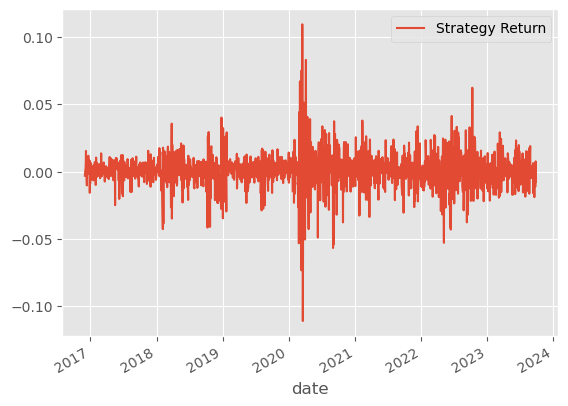

In [35]:
portfolio_df.plot()

In [36]:
pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T

ABBV  AMGN  CVX  HUM  MCK  MPC  REGN  UNH  VLO  XOM
0   0.1   0.1  0.1  0.1  0.1  0.1   0.1  0.1  0.1  0.1

### Visualize Portfolio returns and compare to SP500 returns.

In [37]:
len(optimization_df.columns)

10

In [38]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2016-12-01        -0.003129     -0.003682
2016-12-02        -0.001025      0.000501
2016-12-05         0.002786      0.005990
2016-12-06         0.006830      0.003162
2016-12-07         0.015291      0.012996
...                     ...           ...
2023-09-25         0.003511      0.004196
2023-09-26        -0.011286     -0.014800
2023-09-27         0.005183      0.000399
2023-09-28         0.007524      0.005781
2023-09-29        -0.007739     -0.002430

[1718 rows x 2 columns]

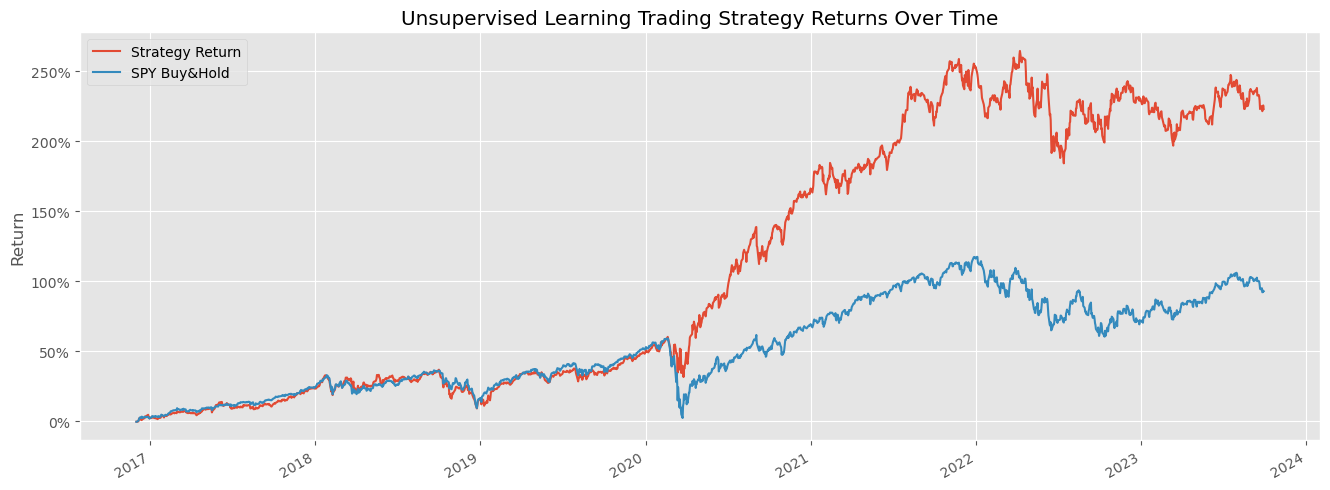

In [39]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()